# Final Project Submission

Please fill out:
* Student name: Michael Flores
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni 
* Blog post URL: https://medium.com/@msf894/flatiron-school-project-2-king-county-housing-dataset-d123dc9b6b3f

# Initial Setup

In [1314]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [1315]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1316]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and Descriptions

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Data Cleaning and Exploration

## Checking and filling in null values

In [1317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1318]:
# Checking for columns with null or missing values first
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1319]:
data['waterfront'].value_counts(normalize = True,dropna = False)

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

The high percentage of non-waterfront properties indicates that replacing nulls with 0 is viable.

In [1320]:
data['view'].value_counts(normalize = True,dropna = False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

Most properties have not been viewed at all indicating that replacing with 0 is viable. View appears as if it can be converted to a binary variable.

In [1321]:
data['yr_renovated'].value_counts(normalize = True, dropna = False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

High percentage of homes not being renovated at all. It appears as if it can be converted to a binary variable.

In [1322]:
data2 = data
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1323]:
# Filling in null values for waterfront with 0

data2['waterfront'] = data2['waterfront'].fillna(0)

In [1324]:
# Confirming changes
data2['waterfront'] = data2['waterfront'].astype('int64')
data2['waterfront'].value_counts(normalize = True)

0    0.99324
1    0.00676
Name: waterfront, dtype: float64

In [1325]:
# Filling in null values for view with 0

data2['view'] = data2['view'].fillna(0)

In [1326]:
# Confirming changes

data2['view'] = data2['view'].astype('int64')
data2['view'].value_counts(normalize = True)

0    0.902209
2    0.044312
3    0.023522
1    0.015280
4    0.014678
Name: view, dtype: float64

In [1327]:
data2['yr_renovated'] = data2['yr_renovated'].fillna(0)

In [1328]:
data2['yr_renovated'] = data2['yr_renovated'].astype('int64')
data2['yr_renovated'].value_counts(normalize = True)

0       0.965551
2014    0.003380
2003    0.001435
2013    0.001435
2007    0.001389
          ...   
1976    0.000046
1953    0.000046
1951    0.000046
1946    0.000046
1944    0.000046
Name: yr_renovated, Length: 70, dtype: float64

In [1329]:
# Confirming all null columns have been handled
data2.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Dealing with duplicates

In [1331]:
#Checking for duplicated rows that may be in the dataset
duplicated_rows = data2[data2.duplicated()]
duplicated_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No duplicated rows found.

In [1332]:
for col in data2.columns:
    print(data2[col].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014     142
6/25/2014     131
6/26/2014     131
7/8/2014      127
4/27/2015     126
             ... 
1/10/2015       1
11/30/2014      1
2/15/2015       1
8/30/2014       1
7/27/2014       1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25

Looking at the value counts for ids reveals that are multiples of the same id in this dataset. This is most likely due to the same house being resold multiple times over the year span.

I also noted that there is a '?' value for sqft_basement column which I will address later on.

In [1333]:
# Checking to see number of duplicated ids
data3 = data2
duplicate_ids = data3[data3.duplicated(['id'])]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0.0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080.0,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0.0,2012,0,98065,47.5168,-121.883,2910,5260
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10.0,2004,0,98118,47.5419,-122.271,1330,1466
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598


In [1334]:
# Checking to see all unique and duplicated rows

duplicate_ids = data3[data3.duplicated(['id'], keep = False)]
duplicate_ids

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290.0,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600.0,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280.0,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0.0,2013,0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0.0,1933,0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0.0,2013,0,98065,47.5184,-121.886,2850,6000


It appears that sequential rows are for any unique house and its duplicates. For example, row 93 and 94 correspond to the same house. The last row for a house contains the most recent house sale data which is what I'll use. I will then remove all other duplicated rows.

In [1335]:
# Removing and confirming deletion of duplicated rows
data4 = data3
data4.drop_duplicates(subset='id', keep = 'last', inplace= True)
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

## Handling incorrect values

Now I wanted to handle the '?' value we discovered in sqft_basement. My initial thought was that this represented a placeholder value so I took a closer look at what were the prevalent values for the houses.

In [1336]:
print(data4['sqft_basement'].value_counts(normalize = True))

0.0       0.593651
?         0.021102
600.0     0.010084
700.0     0.009617
500.0     0.009617
            ...   
417.0     0.000047
915.0     0.000047
1880.0    0.000047
266.0     0.000047
3000.0    0.000047
Name: sqft_basement, Length: 304, dtype: float64


In [1337]:
basement = data4[data4.sqft_basement != '?']
basement['sqft_basement'] = basement['sqft_basement'].astype('float64')
basement

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287


Looking at the houses that do have information on basement square footage, I noticed that sqft_basement is the result of sqft_living minus sqft_above. I could use this to help calculate the missing values for the basement column

In [1338]:
# Looking at only the houses with misssing basement values
basement_missing = data4[data4.sqft_basement == '?']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,?,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,?,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,?,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,?,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,?,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,?,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,?,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,?,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,?,2010,0,98023,47.2815,-122.356,2380,5396


In [1339]:
basement_missing['sqft_basement'] = basement_missing['sqft_living'] - basement_missing['sqft_above']
basement_missing

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0,0,...,9,3595,0,2014,0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0,0,...,10,3450,0,2002,0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0,0,...,7,1160,380,1980,0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0,0,...,7,1390,970,2008,0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0,0,...,7,2330,0,2013,0,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,0,2008,0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0,0,...,7,2380,0,2010,0,98023,47.2815,-122.356,2380,5396


In [1340]:
basement_missing['sqft_basement'].astype('float64')

6          0.0
18         0.0
42         0.0
79         0.0
112      380.0
         ...  
21442    970.0
21447      0.0
21473      0.0
21519      0.0
21581      0.0
Name: sqft_basement, Length: 452, dtype: float64

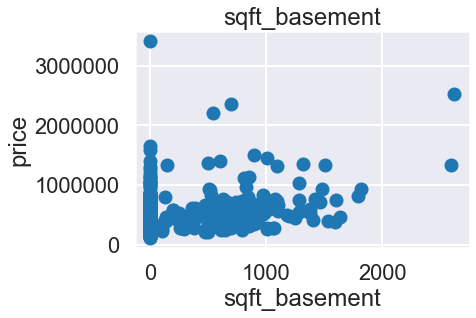

In [1341]:
# Confirming that changes to basement column doesn't yield invalid values such
# as negatives
plt.scatter(basement_missing['sqft_basement'], basement_missing.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

In [1342]:
# Changing the basement column for the dataset
data5 = data4
data5['sqft_basement'] = data5['sqft_living'] - data5['sqft_above']
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

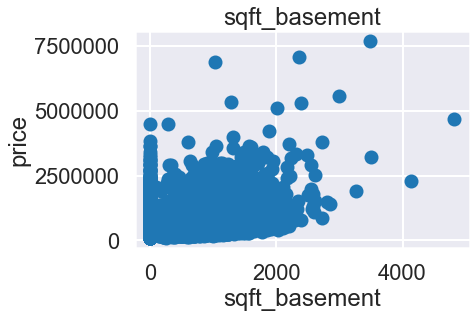

In [1343]:
plt.scatter(data5['sqft_basement'], data5.price)
plt.xlabel('sqft_basement')
plt.ylabel('price')
plt.title('sqft_basement')
plt.show()

## Dealing with outliers and data types

In [1344]:
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


Looking at the min and max values for each column, I noticed that one house was listed as 33 houses and decided to examine it further.

In [1345]:
data5.loc[data5['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


Looking at the square footage of the home leads me to believe that this was a typo and was meant to be 3 instead of 33. Changing the bedroom column will allow me to correct it.

In [1346]:
data5.loc[data5['bedrooms'] == 33,'bedrooms'] = 3

In [1347]:
# Confirming changes were made
data5.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.418614e+05,3.372549,2.118429,2083.132633,1.512804e+04,1.495985,0.006816,0.233987,3.410784,7.662792,1791.170215,291.962418,1971.092997,68.956723,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.675569e+05,0.902995,0.768720,918.808412,4.153080e+04,0.540081,0.082280,0.765437,0.650035,1.171971,828.692965,442.875502,29.387141,364.552298,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.249500e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.505500e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [1348]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  int64  
 9   view           21420 non-null  int64  
 10  condition      21420 non-null  int64  
 11  grade          21420 non-null  int64  
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

The next variable type I will deal with is date due to the fact that it is a string type. I will first convert it to datetime.

### Changing date column 

In [1349]:
# Changing date to date time and confirming changes
data5['date'] = pd.to_datetime(data5['date'])
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     21420 non-null  int64         
 9   view           21420 non-null  int64         
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  int64         
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   2142

Due to the fact that datetime is not compatible with linear regressions models, I decided to separate each section of date into its own numerical columns. I decided to separate month and year sold.

In [1350]:
# Parsing the month and year and creating new columns for the dataframe
data5['month_sold'] = pd.DatetimeIndex(data5['date']).month
data5['year_sold'] = pd.DatetimeIndex(data5['date']).year
data5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [1351]:
# Dropping date column because it is no longer needed
data5.drop(['date'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


## Filtering out unwanted data

Upon examining the King County website for more detailed column descriptions, I noted that there was more nuance with the grade descriptions. According to their criteria, a minimum grade of 6 designates a house that is up to building code. Since we are only interested in homes that are currently stable, I decided to filter out those homes. For reference, the info about Building Grade can be found at the following website: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

In [1352]:
data5['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13], dtype=int64)

In [1353]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   price          21420 non-null  float64
 2   bedrooms       21420 non-null  int64  
 3   bathrooms      21420 non-null  float64
 4   sqft_living    21420 non-null  int64  
 5   sqft_lot       21420 non-null  int64  
 6   floors         21420 non-null  float64
 7   waterfront     21420 non-null  int64  
 8   view           21420 non-null  int64  
 9   condition      21420 non-null  int64  
 10  grade          21420 non-null  int64  
 11  sqft_above     21420 non-null  int64  
 12  sqft_basement  21420 non-null  int64  
 13  yr_built       21420 non-null  int64  
 14  yr_renovated   21420 non-null  int64  
 15  zipcode        21420 non-null  int64  
 16  lat            21420 non-null  float64
 17  long           21420 non-null  float64
 18  sqft_l

In [1354]:
# Approximately 260 homes are removed as a result but we still have a substantial
# dataset
data5 = data5.loc[data5['grade'] > 5]
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   view           21158 non-null  int64  
 9   condition      21158 non-null  int64  
 10  grade          21158 non-null  int64  
 11  sqft_above     21158 non-null  int64  
 12  sqft_basement  21158 non-null  int64  
 13  yr_built       21158 non-null  int64  
 14  yr_renovated   21158 non-null  int64  
 15  zipcode        21158 non-null  int64  
 16  lat            21158 non-null  float64
 17  long           21158 non-null  float64
 18  sqft_l

## Dealing with Categorical Variables

In order to make a regression model, I needed to first deal with any categorical variables and transform them to be compatible.

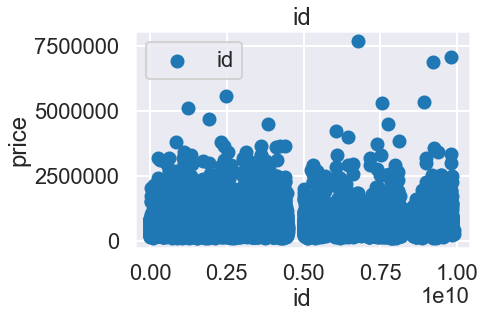

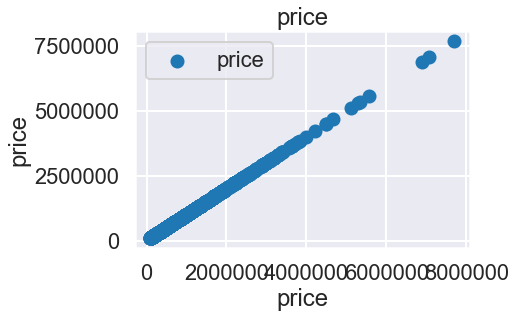

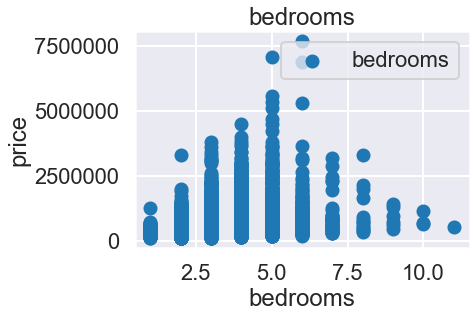

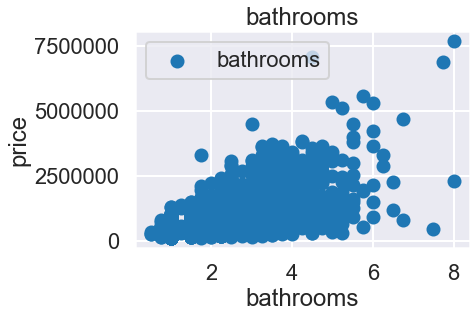

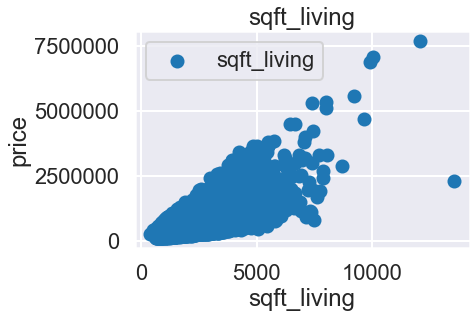

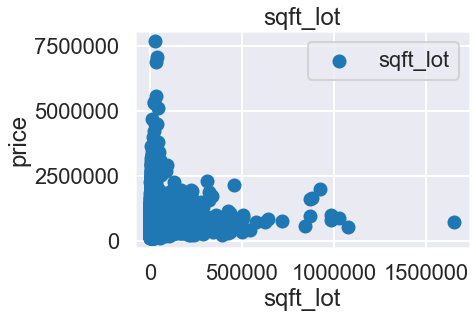

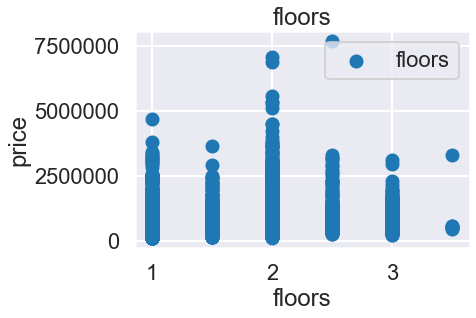

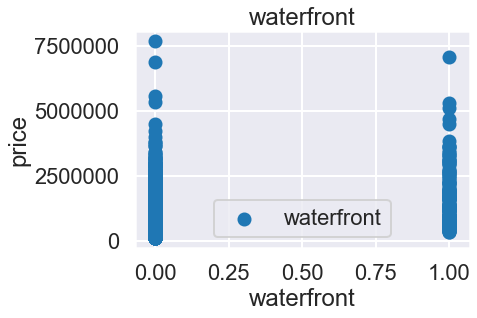

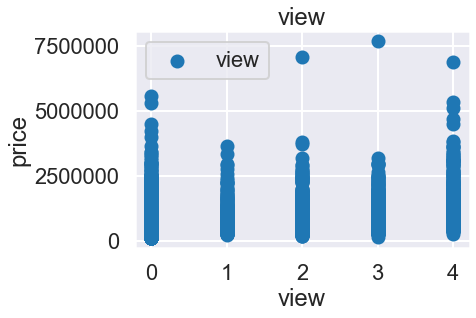

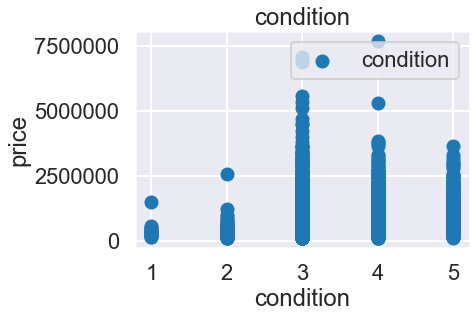

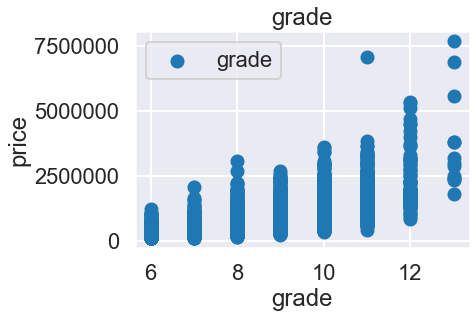

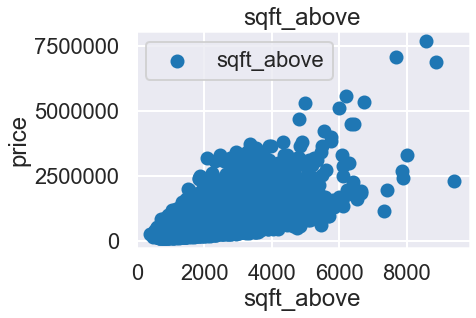

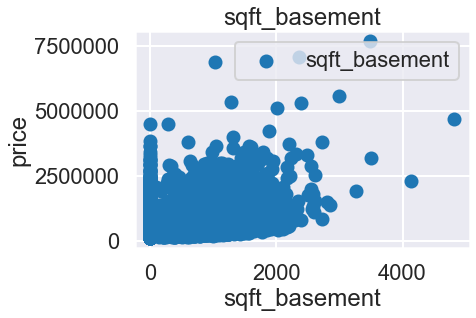

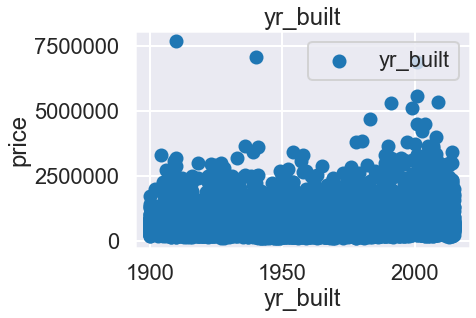

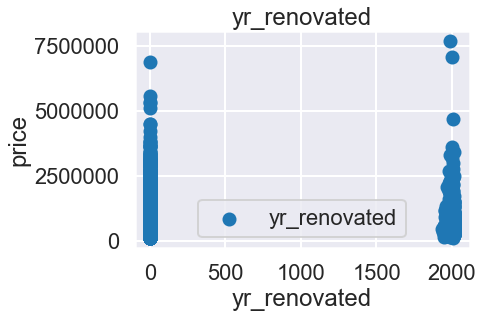

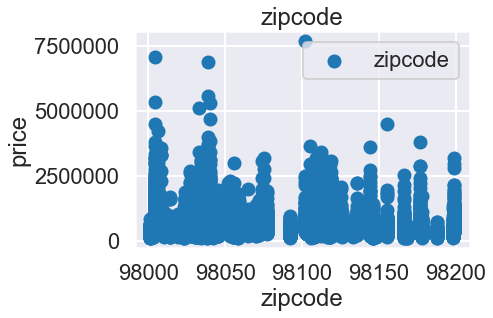

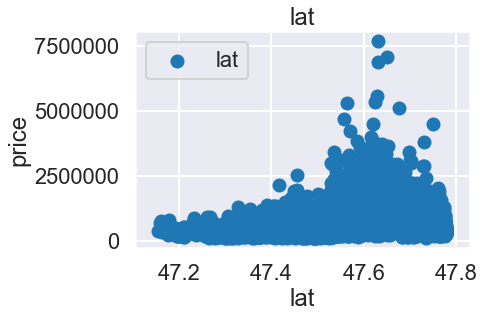

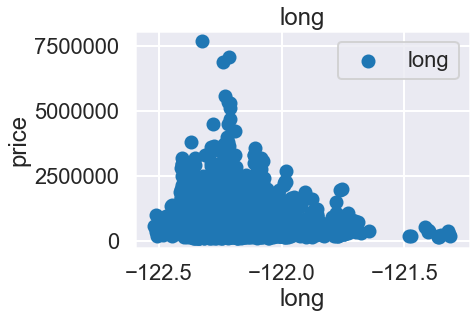

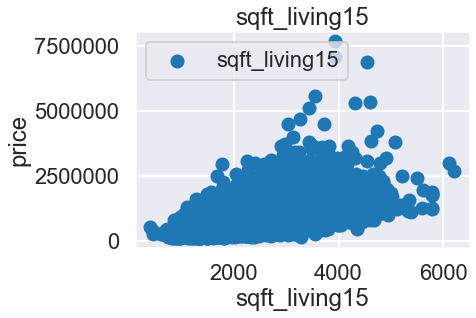

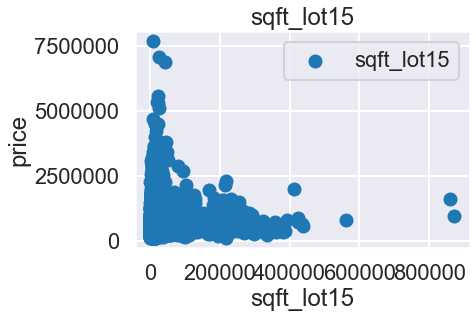

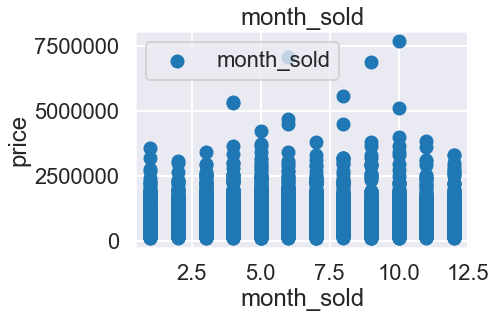

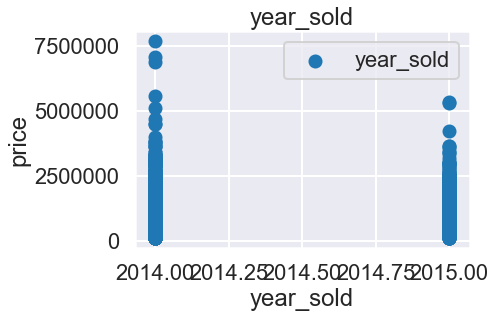

In [1355]:
# Plotting all columns in order to distinguish between categorical and continuous variables
for col in data5.columns: 
    plt.scatter(data5[col], data5.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

The following variables were immediately observed to be categorical variables:
bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, month_sold, year_sold

Certain variables could be converted to binary variables for ease of analysis. These variables are view, yr_renovated, year_sold. I will first work on the binary variables before deciding how to handle the categorical variables.

### Binary Columns 

In [1356]:
# Creates a new column and maps a 1 if the house has been renovated or a 0 if not

data5['is_renovated'] = data5['yr_renovated'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['yr_renovated'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,is_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,98178,47.5112,-122.257,1340,5650,10,2014,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,98125,47.7210,-122.319,1690,7639,12,2014,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,98028,47.7379,-122.233,2720,8062,2,2015,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,98136,47.5208,-122.393,1360,5000,12,2014,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,98074,47.6168,-122.045,1800,7503,2,2015,0


In [1357]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   view           21158 non-null  int64  
 9   condition      21158 non-null  int64  
 10  grade          21158 non-null  int64  
 11  sqft_above     21158 non-null  int64  
 12  sqft_basement  21158 non-null  int64  
 13  yr_built       21158 non-null  int64  
 14  zipcode        21158 non-null  int64  
 15  lat            21158 non-null  float64
 16  long           21158 non-null  float64
 17  sqft_living15  21158 non-null  int64  
 18  sqft_l

In [1358]:
# Created a viewed column and dropping unneeded view column
data5['was_viewed'] = data5['view'].map(lambda x: 1 if x > 0 else 0)
data5.drop(['view'], axis = 1, inplace = True)
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   condition      21158 non-null  int64  
 9   grade          21158 non-null  int64  
 10  sqft_above     21158 non-null  int64  
 11  sqft_basement  21158 non-null  int64  
 12  yr_built       21158 non-null  int64  
 13  zipcode        21158 non-null  int64  
 14  lat            21158 non-null  float64
 15  long           21158 non-null  float64
 16  sqft_living15  21158 non-null  int64  
 17  sqft_lot15     21158 non-null  int64  
 18  month_

In [1359]:
# Created a sold in 2014 column
data5['2014_sold'] = data5['year_sold'].map(lambda x: 1 if x == 2014 else 0)
data5.drop(['year_sold'], axis = 1, inplace = True)
data5.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2,0,0,0


## Exporting Cleaned Dataset 

Before adding all of the dummy variables to this dataframe, I saved a copy for reference of the dataset cleaned up to this point.

In [1360]:
cleaned_data = data5
cleaned_data.to_csv("king_county_cleaned.csv", index=False)

## Creating Dummy Variables 

I will now create dummy variables for certain categorical variables. The remaining variables will be dealt with by binning them into appropriate columns.

In [1361]:
dummytest = data5
dummytest.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2,0,0,0


In [1362]:
condition = pd.get_dummies(dummytest['condition'], prefix = 'condition', drop_first=True, dtype=int)
condition.head()

,condition_2,condition_3,condition_4,condition_5
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [1363]:
dummy_df1 = pd.concat([dummytest, condition], axis=1)
dummy_df1.drop(['condition'], axis = 1, inplace = True)
dummy_df1.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,...,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,condition_2,condition_3,condition_4,condition_5
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,7,1180,...,1340,5650,10,0,0,1,0,1,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,7,2170,...,1690,7639,12,1,0,1,0,1,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,6,770,...,2720,8062,2,0,0,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,7,1050,...,1360,5000,12,0,0,1,0,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,8,1680,...,1800,7503,2,0,0,0,0,1,0,0


In [1364]:
dummy_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21158 non-null  int64  
 1   price          21158 non-null  float64
 2   bedrooms       21158 non-null  int64  
 3   bathrooms      21158 non-null  float64
 4   sqft_living    21158 non-null  int64  
 5   sqft_lot       21158 non-null  int64  
 6   floors         21158 non-null  float64
 7   waterfront     21158 non-null  int64  
 8   grade          21158 non-null  int64  
 9   sqft_above     21158 non-null  int64  
 10  sqft_basement  21158 non-null  int64  
 11  yr_built       21158 non-null  int64  
 12  zipcode        21158 non-null  int64  
 13  lat            21158 non-null  float64
 14  long           21158 non-null  float64
 15  sqft_living15  21158 non-null  int64  
 16  sqft_lot15     21158 non-null  int64  
 17  month_sold     21158 non-null  int64  
 18  is_ren

That takes care of the dummy variables for most of the columns. Now I will address the columns that will need to be transformed through binning

### Binning Categorical Variables 

In order to reduce the number of dummy variables created for the following columns, I decided to cut the column values into bins and then create dummy variables for those bins.

#### Bedrooms

In [1365]:
dummy_bins = dummy_df1
bins = [0, 2, 5, 8, 11]
bins_bed = pd.cut(dummy_bins['bedrooms'], bins)
bins_bed = bins_bed.cat.as_ordered()
bins_bed.head()

0    (2, 5]
1    (2, 5]
2    (0, 2]
3    (2, 5]
4    (2, 5]
Name: bedrooms, dtype: category
Categories (4, interval[int64]): [(0, 2] < (2, 5] < (5, 8] < (8, 11]]

Text(0.5, 1.0, 'Bedroom Bins')

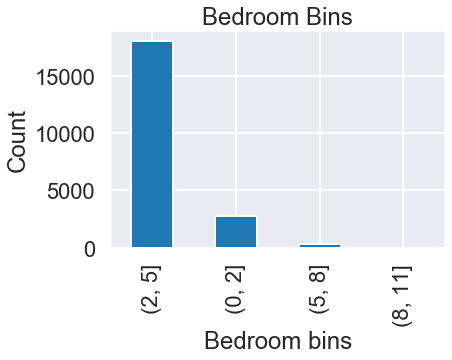

In [1366]:
bins_bed.value_counts().plot(kind='bar')
plt.xlabel('Bedroom bins')
plt.ylabel('Count')
plt.title('Bedroom Bins')

In [1367]:
# Creates dummy variables for the bin variables and drops unneeded grade column
dummy_bins['bedrooms']= bins_bed
dummy_bins['bedrooms'] = dummy_bins['bedrooms'].cat.codes
bed_dummy = pd.get_dummies(bins_bed, prefix='bedrooms')
df1 = dummy_bins
df1.drop(['bedrooms'], axis=1, inplace = True)
df1 = pd.concat([dummy_bins, bed_dummy], axis=1)
df1.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,was_viewed,2014_sold,condition_2,condition_3,condition_4,condition_5,"bedrooms_(0, 2]","bedrooms_(2, 5]","bedrooms_(5, 8]","bedrooms_(8, 11]"
0,7129300520,221900.0,1.00,1180,5650,1.0,0,7,1180,0,...,0,1,0,1,0,0,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,7,2170,400,...,0,1,0,1,0,0,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,6,770,0,...,0,0,0,1,0,0,1,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,7,1050,910,...,0,1,0,0,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,1,0,0,0,1,0,0


In [1368]:
df1.drop(['bedrooms_(8, 11]'], axis = 1, inplace = True)
df1 = df1.rename(columns={
       'bedrooms_(0, 2]':'bedrooms_1_2', 'bedrooms_(2, 5]':'bedrooms_3_5', 'bedrooms_(5, 8]':'bedrooms_6_8'})
df1.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,...,is_renovated,was_viewed,2014_sold,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8
0,7129300520,221900.0,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,1,0,1,0,0,0,1,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,7,2170,400,...,1,0,1,0,1,0,0,0,1,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,6,770,0,...,0,0,0,0,1,0,0,1,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,1,0,0,0,1,0,1,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,1,0


#### Grade 

In [1369]:
# Create bins for Grade column and bins the column's value accordingly 
bins = [5, 6, 8, 10, 13]
bins_grd = pd.cut(df1['grade'], bins)
bins_grd = bins_grd.cat.as_ordered()
bins_grd.head()

0    (6, 8]
1    (6, 8]
2    (5, 6]
3    (6, 8]
4    (6, 8]
Name: grade, dtype: category
Categories (4, interval[int64]): [(5, 6] < (6, 8] < (8, 10] < (10, 13]]

Text(0.5, 1.0, 'Grade Bins')

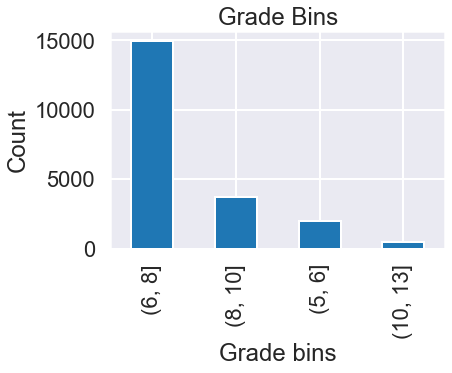

In [1370]:
bins_grd.value_counts().plot(kind='bar')
plt.xlabel('Grade bins')
plt.ylabel('Count')
plt.title('Grade Bins')

In [1371]:
# Creates dummy variables for the bin variables and drops unneeded grade column
df1['grade']= bins_grd
df1['grade'] = df1['grade'].cat.codes
grd_dummy = pd.get_dummies(bins_grd, prefix='grd', drop_first=True)
df2 = df1.drop(['grade'], axis=1, inplace = True)
df2 = pd.concat([df1, grd_dummy], axis=1)
df2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,"grd_(6, 8]","grd_(8, 10]","grd_(10, 13]"
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,0,1955,...,0,1,0,0,0,1,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,400,1951,...,0,1,0,0,0,1,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,0,1933,...,0,1,0,0,1,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,910,1965,...,0,0,0,1,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,0,1987,...,0,1,0,0,0,1,0,1,0,0


In [1372]:
# rename column to match appropriate designation for grade
df_dv2 = df2.rename(columns={
       'grd_(5, 6]':'grade_poor', 'grd_(6, 8]':'grade_average', 'grd_(8, 10]':'grade_good', 'grd_(10, 13]':'grade_excellent'})
df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,condition_2,condition_3,condition_4,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,0,1955,...,0,1,0,0,0,1,0,1,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,400,1951,...,0,1,0,0,0,1,0,1,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,0,1933,...,0,1,0,0,1,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,910,1965,...,0,0,0,1,0,1,0,1,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,0,1987,...,0,1,0,0,0,1,0,1,0,0


#### Months

In [1373]:
# Create bins for Month column and bins the column's value accordingly 
bins = [0, 3, 6, 9, 12]
bins_mnth = pd.cut(df_dv2['month_sold'], bins)
bins_mnth = bins_mnth.cat.as_ordered()
bins_mnth.head()

0    (9, 12]
1    (9, 12]
2     (0, 3]
3    (9, 12]
4     (0, 3]
Name: month_sold, dtype: category
Categories (4, interval[int64]): [(0, 3] < (3, 6] < (6, 9] < (9, 12]]

Text(0.5, 1.0, 'Month Bins')

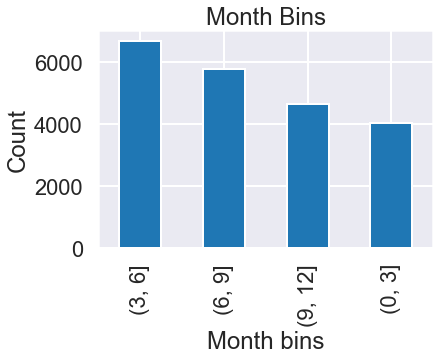

In [1374]:
bins_mnth.value_counts().plot(kind='bar')
plt.xlabel('Month bins')
plt.ylabel('Count')
plt.title('Month Bins')

In [1375]:
# Creates dummy variables for the bin variables and drops unneeded grade column
df_dv2['month_sold']= bins_mnth
df_dv2['month_sold'] = df_dv2['month_sold'].cat.codes
grd_dummy = pd.get_dummies(bins_mnth, prefix='months_sold', drop_first=True)
df3 = df_dv2
df3.drop(['month_sold'], axis=1, inplace = True)
df3 = pd.concat([df_dv2, grd_dummy], axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21158 non-null  int64  
 1   price                21158 non-null  float64
 2   bathrooms            21158 non-null  float64
 3   sqft_living          21158 non-null  int64  
 4   sqft_lot             21158 non-null  int64  
 5   floors               21158 non-null  float64
 6   waterfront           21158 non-null  int64  
 7   sqft_above           21158 non-null  int64  
 8   sqft_basement        21158 non-null  int64  
 9   yr_built             21158 non-null  int64  
 10  zipcode              21158 non-null  int64  
 11  lat                  21158 non-null  float64
 12  long                 21158 non-null  float64
 13  sqft_living15        21158 non-null  int64  
 14  sqft_lot15           21158 non-null  int64  
 15  is_renovated         21158 non-null 

In [1376]:
df_dv2 = df3.rename(columns={
       'months_sold_(0, 3]':'sold_quarter_one', 'months_sold_(3, 6]':'sold_quarter_two',
    'months_sold_(6, 9]':'sold_quarter_three', 'months_sold_(9, 12]':'sold_quarter_four'})

df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,condition_5,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent,sold_quarter_two,sold_quarter_three,sold_quarter_four
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,0,1955,...,0,0,1,0,1,0,0,0,0,1
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,400,1951,...,0,0,1,0,1,0,0,0,0,1
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,0,1933,...,0,1,0,0,0,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,910,1965,...,1,0,1,0,1,0,0,0,0,1
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,0,1987,...,0,0,1,0,1,0,0,0,0,0


#### Zipcode and Cities

Dealing with the zipcode column 

In [1377]:
df_dv2.columns

Index(['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'is_renovated',
       'was_viewed', '2014_sold', 'condition_2', 'condition_3', 'condition_4',
       'condition_5', 'bedrooms_1_2', 'bedrooms_3_5', 'bedrooms_6_8',
       'grade_average', 'grade_good', 'grade_excellent', 'sold_quarter_two',
       'sold_quarter_three', 'sold_quarter_four'],
      dtype='object')

In [1378]:
df_dv2['zipcode'].nunique() 

70

Having 70 different zip codes is not practical in terms of creating that many dummy variables for each zipcode. Instead I will attribute a city to each zip code and create dummy variables for each city.

In [1379]:
# Zipcodes and city taken from the following link:
# https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA

cities = pd.read_csv('king_county_zipcodes.csv')
cities.head()

,zipcode,city
0,98002,Auburn
1,98092,Auburn
2,98224,Baring
3,98004,Bellevue
4,98005,Bellevue


In [1380]:
# Joining the previous dataframe with the cities dataframe on zipcode
df_dv2 = df_dv2.join(cities.set_index('zipcode'), on = 'zipcode', how = 'left')
df_dv2.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,bedrooms_1_2,bedrooms_3_5,bedrooms_6_8,grade_average,grade_good,grade_excellent,sold_quarter_two,sold_quarter_three,sold_quarter_four,city
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,0,1955,...,0,1,0,1,0,0,0,0,1,Bryn Mawr-Skyway
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,400,1951,...,0,1,0,1,0,0,0,0,1,Seattle
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,0,1933,...,1,0,0,0,0,0,0,0,0,Kenmore
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,910,1965,...,0,1,0,1,0,0,0,0,1,Seattle
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,0,1987,...,0,1,0,1,0,0,0,0,0,Sammamish


In [1381]:
condition = pd.get_dummies(df_dv2['city'], prefix = 'city', drop_first=True)
condition.head()

,city_Bellevue,city_Black Diamond,city_Bothell,city_Bryn Mawr-Skyway,city_Burien,city_Carnation,city_Cottage Lake,city_Covington,city_Des Moines,city_Duvall,...,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Union Hill-Novelty Hill,city_Vashon,city_White Center,city_Woodinville
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [1382]:
dummy_cities = pd.concat([df_dv2, condition], axis=1)
dummy_cities.drop(['city'], axis = 1, inplace = True)
dummy_cities.drop(['zipcode'], axis = 1, inplace = True)
dummy_cities.head()

,id,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,yr_built,...,city_Sammamish,city_SeaTac,city_Seattle,city_Shoreline,city_Snoqualmie,city_Tukwila,city_Union Hill-Novelty Hill,city_Vashon,city_White Center,city_Woodinville
0,7129300520,221900.0,1.00,1180,5650,1.0,0,1180,0,1955,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,2.25,2570,7242,2.0,0,2170,400,1951,...,0,0,1,0,0,0,0,0,0,0
2,5631500400,180000.0,1.00,770,10000,1.0,0,770,0,1933,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,3.00,1960,5000,1.0,0,1050,910,1965,...,0,0,1,0,0,0,0,0,0,0
4,1954400510,510000.0,2.00,1680,8080,1.0,0,1680,0,1987,...,1,0,0,0,0,0,0,0,0,0


#### Floors 

In [1383]:
# Create bins for Floors column and bins the column's value accordingly 
bins = [0, 1.9, 2.9, 3.9]
bins_floor = pd.cut(dummy_cities['floors'], bins)
bins_floor = bins_floor.cat.as_ordered()
bins_floor.head()

0    (0.0, 1.9]
1    (1.9, 2.9]
2    (0.0, 1.9]
3    (0.0, 1.9]
4    (0.0, 1.9]
Name: floors, dtype: category
Categories (3, interval[float64]): [(0.0, 1.9] < (1.9, 2.9] < (2.9, 3.9]]

Text(0.5, 1.0, 'Floor Bins')

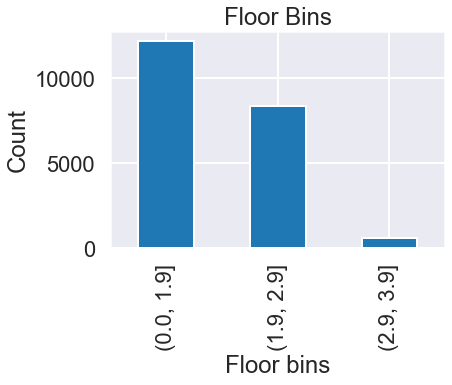

In [1384]:
bins_floor.value_counts().plot(kind='bar')
plt.xlabel('Floor bins')
plt.ylabel('Count')
plt.title('Floor Bins')

In [1385]:
# Creates dummy variables for the floor variables and drops unneeded grade column
dummy_cities['floors']= bins_floor
dummy_cities['floors'] = dummy_cities['floors'].cat.codes
floor_dummy = pd.get_dummies(bins_floor, prefix='floors')
floor_df = dummy_cities
floor_df.drop(['floors'], axis=1, inplace = True)
floor_df = pd.concat([dummy_cities, floor_dummy], axis=1)
floor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21158 non-null  int64  
 1   price                         21158 non-null  float64
 2   bathrooms                     21158 non-null  float64
 3   sqft_living                   21158 non-null  int64  
 4   sqft_lot                      21158 non-null  int64  
 5   waterfront                    21158 non-null  int64  
 6   sqft_above                    21158 non-null  int64  
 7   sqft_basement                 21158 non-null  int64  
 8   yr_built                      21158 non-null  int64  
 9   lat                           21158 non-null  float64
 10  long                          21158 non-null  float64
 11  sqft_living15                 21158 non-null  int64  
 12  sqft_lot15                    21158 non-null  int64  
 13  i

In [1386]:
cleaned_with_dummies = floor_df.rename(columns={
       'floors_(0.0, 1.9]':'floors_1', 'floors_(1.9, 2.9]':'floors_2'})
cleaned_with_dummies.drop(['floors_(2.9, 3.9]'], axis=1, inplace = True)
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21158 non-null  int64  
 1   price                         21158 non-null  float64
 2   bathrooms                     21158 non-null  float64
 3   sqft_living                   21158 non-null  int64  
 4   sqft_lot                      21158 non-null  int64  
 5   waterfront                    21158 non-null  int64  
 6   sqft_above                    21158 non-null  int64  
 7   sqft_basement                 21158 non-null  int64  
 8   yr_built                      21158 non-null  int64  
 9   lat                           21158 non-null  float64
 10  long                          21158 non-null  float64
 11  sqft_living15                 21158 non-null  int64  
 12  sqft_lot15                    21158 non-null  int64  
 13  i

In [1387]:
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21158 non-null  int64  
 1   price                         21158 non-null  float64
 2   bathrooms                     21158 non-null  float64
 3   sqft_living                   21158 non-null  int64  
 4   sqft_lot                      21158 non-null  int64  
 5   waterfront                    21158 non-null  int64  
 6   sqft_above                    21158 non-null  int64  
 7   sqft_basement                 21158 non-null  int64  
 8   yr_built                      21158 non-null  int64  
 9   lat                           21158 non-null  float64
 10  long                          21158 non-null  float64
 11  sqft_living15                 21158 non-null  int64  
 12  sqft_lot15                    21158 non-null  int64  
 13  i

# Question 1: What effect does a house's yard size have on its price?

Having a large house yard is a highly desirable feature for a new house. I wanted to examine whether a larger yard is indicative of a more expensive house.

In [1388]:
data6 = data5
data6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,1955,98178,47.5112,-122.257,1340,5650,10,0,0,1
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,1951,98125,47.7210,-122.319,1690,7639,12,1,0,1
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,1933,98028,47.7379,-122.233,2720,8062,2,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,1965,98136,47.5208,-122.393,1360,5000,12,0,0,1
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,1987,98074,47.6168,-122.045,1800,7503,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,...,2009,98103,47.6993,-122.346,1530,1509,5,0,0,1
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,...,2014,98146,47.5107,-122.362,1830,7200,2,0,0,0
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,...,2009,98144,47.5944,-122.299,1020,2007,6,0,0,1
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,...,2004,98027,47.5345,-122.069,1410,1287,1,0,0,0


In [1389]:
#Creating the yard size column by subtracting the sqft of the house from the lot
data6['sqft_yard'] = data6['sqft_lot'] - data6['sqft_living']
data6

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,sqft_yard
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,3,7,...,98178,47.5112,-122.257,1340,5650,10,0,0,1,4470
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,3,7,...,98125,47.7210,-122.319,1690,7639,12,1,0,1,4672
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,3,6,...,98028,47.7379,-122.233,2720,8062,2,0,0,0,9230
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,5,7,...,98136,47.5208,-122.393,1360,5000,12,0,0,1,3040
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,3,8,...,98074,47.6168,-122.045,1800,7503,2,0,0,0,6400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,3,8,...,98103,47.6993,-122.346,1530,1509,5,0,0,1,-399
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,3,8,...,98146,47.5107,-122.362,1830,7200,2,0,0,0,3503
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,3,7,...,98144,47.5944,-122.299,1020,2007,6,0,0,1,330
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0,3,8,...,98027,47.5345,-122.069,1410,1287,1,0,0,0,788


In [1390]:
data6.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,is_renovated,was_viewed,2014_sold,sqft_yard
count,2.115800e+04,2.115800e+04,21158.000000,21158.000000,21158.000000,2.115800e+04,21158.000000,21158.000000,21158.000000,21158.000000,...,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,21158.000000,2.115800e+04
mean,4.588512e+09,5.455185e+05,3.385812,2.131156,2097.155024,1.502280e+04,1.501087,0.006711,3.409821,7.697136,...,98077.852160,47.560977,-122.214029,1995.783581,12735.535259,6.565696,0.034739,0.098686,0.675395,1.292565e+04
std,2.876224e+09,3.681210e+05,0.893793,0.763959,914.866659,4.069941e+04,0.541010,0.081650,0.645864,1.137003,...,53.439413,0.138582,0.140020,685.081296,27243.063318,3.115827,0.183121,0.298247,0.468238,4.054266e+04
min,1.000102e+06,8.400000e+04,1.000000,0.500000,390.000000,5.200000e+02,1.000000,0.000000,1.000000,6.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,0.000000,0.000000,0.000000,-1.900000e+03
25%,2.125570e+09,3.250000e+05,3.000000,1.750000,1440.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,...,98033.000000,47.471800,-122.328000,1494.250000,5100.000000,4.000000,0.000000,0.000000,0.000000,3.060000e+03
50%,3.905010e+09,4.550000e+05,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,...,98065.000000,47.573750,-122.230000,1850.000000,7620.000000,6.000000,0.000000,0.000000,1.000000,5.690000e+03
75%,7.327500e+09,6.500000e+05,4.000000,2.500000,2560.000000,1.065975e+04,2.000000,0.000000,4.000000,8.000000,...,98117.000000,47.678500,-122.124000,2370.000000,10078.750000,9.000000,0.000000,0.000000,1.000000,8.646750e+03
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000,1.000000,1.000000,1.000000,1.650059e+06


In [1391]:
# Removing instances where sqft_yard is negative. Mostly seen with houses with
# multiple floors 

yard_area = data6.loc[data6['sqft_yard'] > 0]

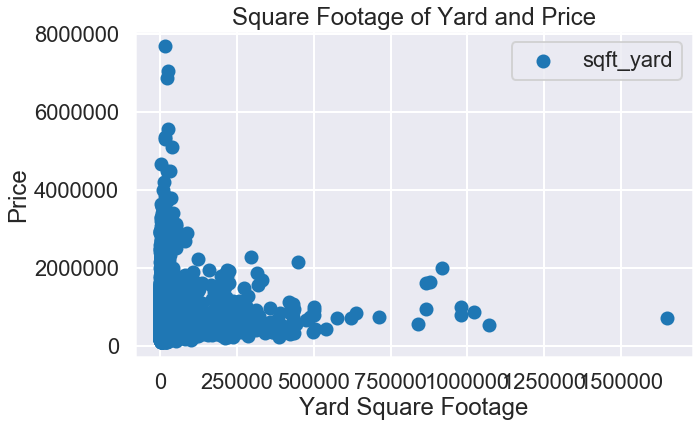

In [1392]:
plt.figure(figsize = (10,6))
plt.scatter(yard_area['sqft_yard'], yard_area.price, label='sqft_yard')
plt.legend()
plt.xlabel('Yard Square Footage')
plt.ylabel('Price')
plt.title('Square Footage of Yard and Price')
plt.show()

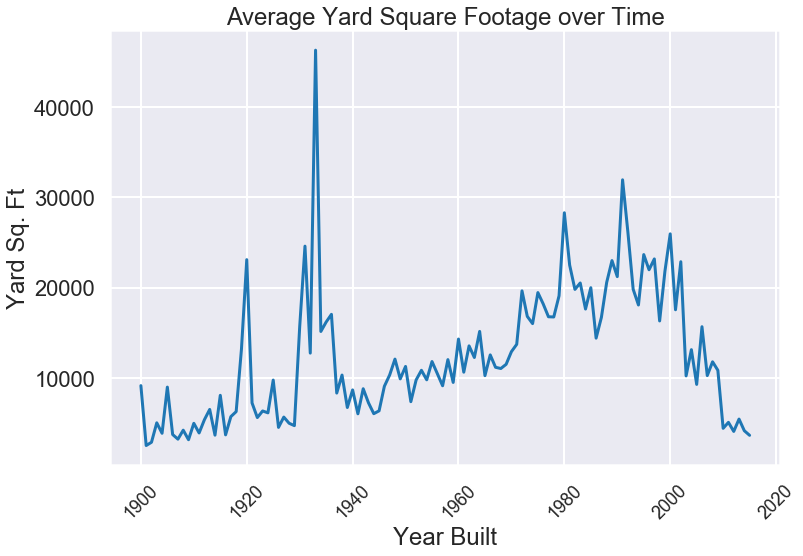

In [1393]:
import scipy.stats as stats

plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'sqft_yard', data=yard_area, ci = None)
plt.xticks(fontsize=18, rotation = 45)
plt.xlabel('Year Built')
plt.ylabel('Yard Sq. Ft')
plt.title('Average Yard Square Footage over Time')
plt.show()

No handles with labels found to put in legend.


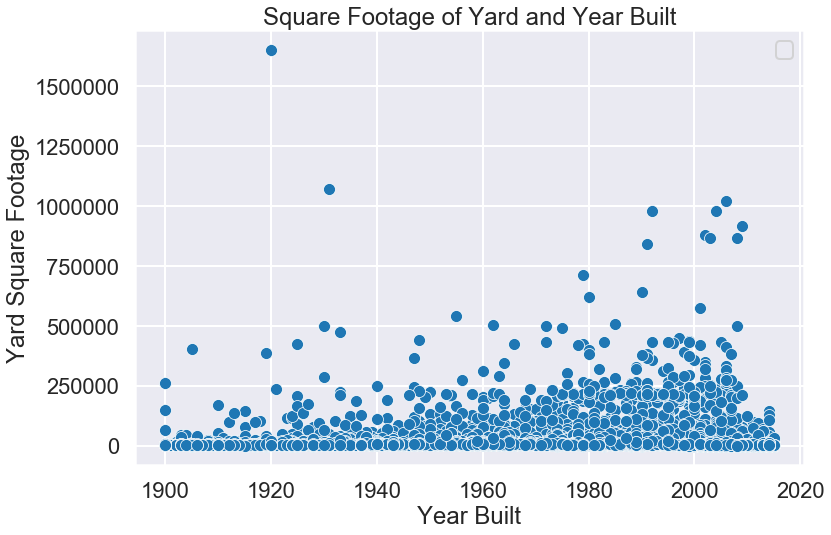

In [1394]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.scatterplot(x = 'yr_built', y = 'sqft_yard', data=yard_area)
plt.xlabel('Year Built')
plt.ylabel('Yard Square Footage')
plt.title('Square Footage of Yard and Year Built')
plt.legend(fancybox=True)
plt.show()

# Question 2: How does a bedroom to bathroom ratio affect the price of a house?

Having an appropriate amount of bedrooms and bathrooms is ideal for homeowners seeking a family house. For this we wanted to see whether the ratio of bedroom to bathrooms would impact the price of a house. A lower ratio is more ideal.

In [1395]:
data7 = data4
data7.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [1396]:
# Creates the column for the bed/bath ratio. I limited the ratio to below 4
# as it wouldn't be an ideal setup in a house for larger families

data7['bedrooms'] = data7['bedrooms'].astype('int64')
data7['bed_bath_ratio'] = round(data7['bedrooms'] / data7['bathrooms'],2)
bed_bath = data7.loc[data7['bed_bath_ratio'] < 4]

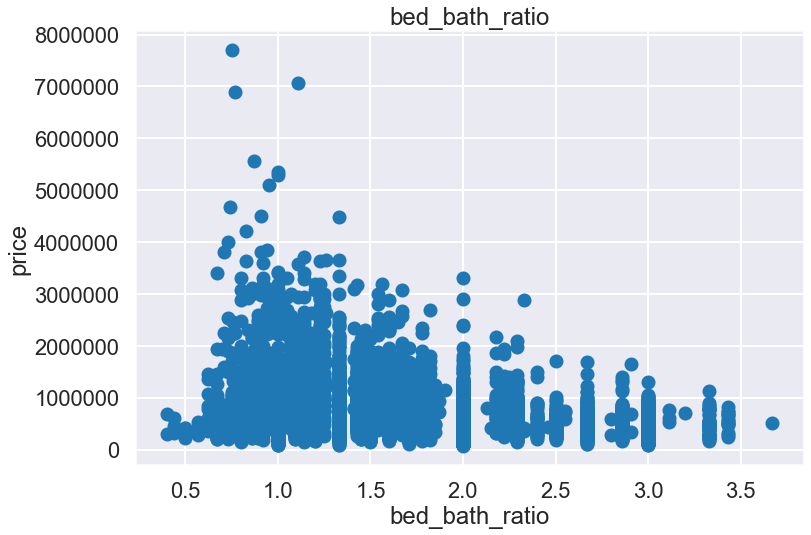

In [1397]:
plt.figure(figsize = (12,8))
plt.scatter(bed_bath['bed_bath_ratio'], bed_bath.price, label='bed_bath_ratio')
plt.xlabel('bed_bath_ratio')
plt.ylabel('price')
plt.title('bed_bath_ratio')
plt.show()

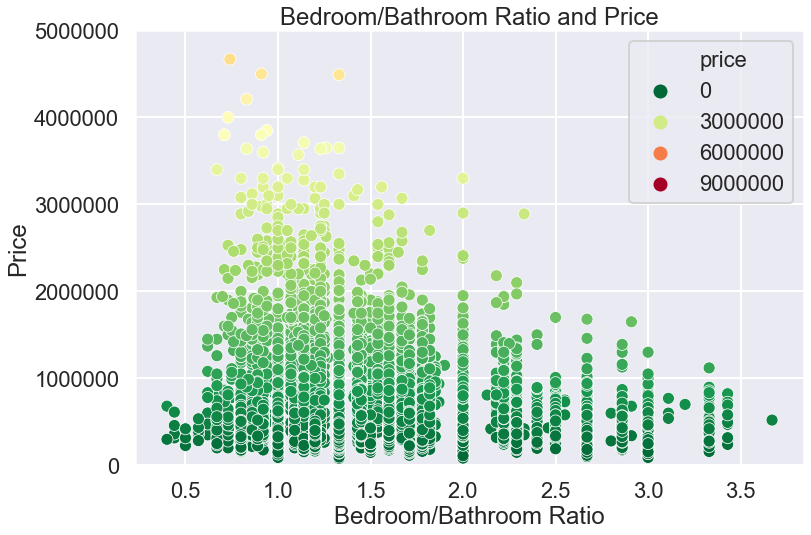

In [1398]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.scatterplot(x = 'bed_bath_ratio', y = 'price', data=bed_bath, hue= 'price', palette = 'RdYlGn_r')
#sns.regplot(x = 'bed_bath_ratio', y = 'price', data=bed_bath, color = 'green')
plt.xlabel('Bedroom/Bathroom Ratio')
plt.ylabel('Price')
plt.title('Bedroom/Bathroom Ratio and Price')
plt.ylim(0,5000000)
plt.show()

I observed that lower ratios generally corresponded with higher house prices. This would be in part due to houses that contained a high and near identical number of bedrooms and bathrooms. Home buyers that are planning larger families would have to plan accordingly as to what structure they want in their home.

No handles with labels found to put in legend.


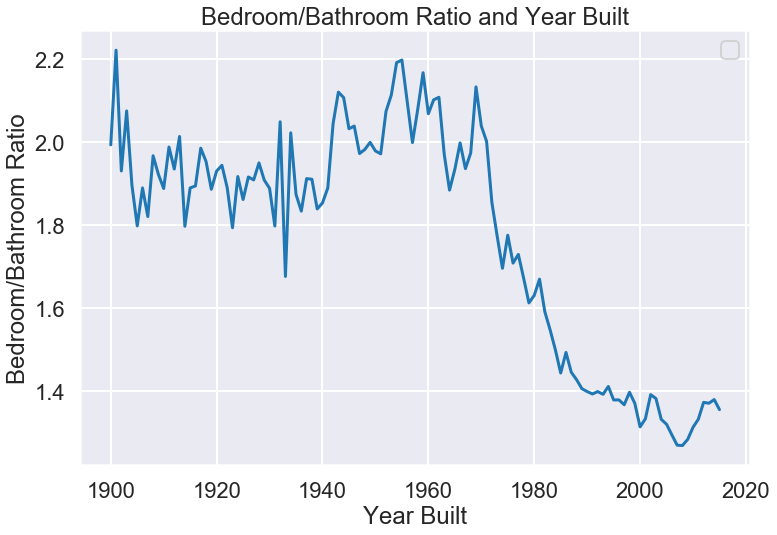

In [1399]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'bed_bath_ratio', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Bedroom/Bathroom Ratio')
plt.title('Bedroom/Bathroom Ratio and Year Built')
plt.legend(fancybox=True)
plt.show()

I observed that lower ratios became more prevalent over the years. This would be in part due to houses that contained a high and near identical number of bedrooms and bathrooms. Home buyers that are planning larger families would have to plan accordingly as to what structure they want in their home.

# Question 3 and 4: How do housing prices change based on the age of the house? How did housing sizes evolve over time?

I wanted to observe whether housing prices were affected by the year in which a house was built. I also wanted to observe whether there had been any changes in housing sizes over the years.

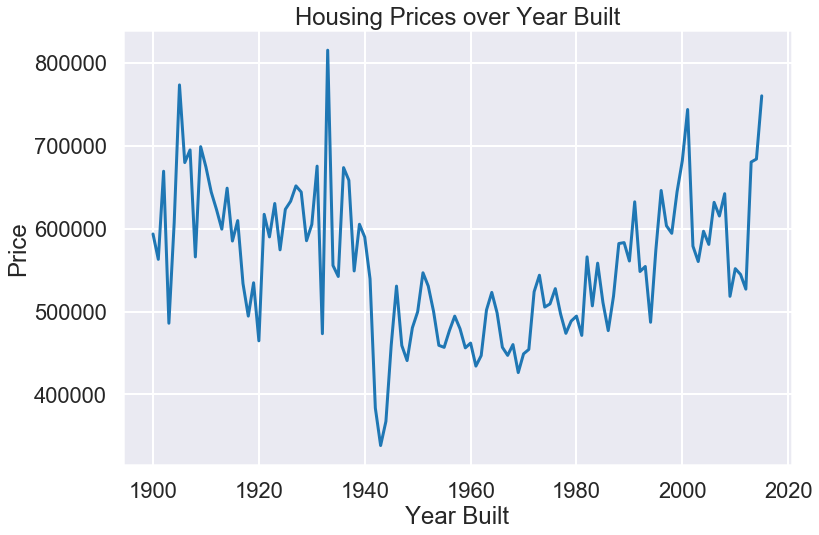

In [1400]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'price', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.title('Housing Prices over Year Built')
plt.show()

Housing prices fluctuates greatly according to the year in which a house was built. The highest peaks were observed both in pre-war era houses as well as more recent years. This may correspond to the novelty and historical aspects of a pre-war building as well the more modern designs. A family looking to buy cheaper homes may need to focus on homes built between 1940 and 1990.

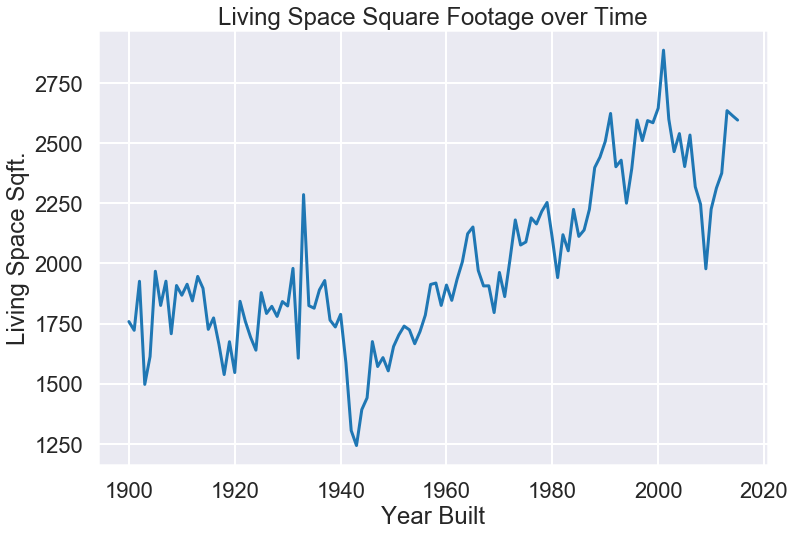

In [1401]:
plt.figure(figsize = (12,8))
sns.set_context("poster")
sns.lineplot(x = 'yr_built', y = 'sqft_living', data=bed_bath, ci = None)
plt.xlabel('Year Built')
plt.ylabel('Living Space Sqft.')
plt.title('Living Space Square Footage over Time')
plt.show()

I observed that the average living space began to increase significantly after the 1940s. This is most likely due to increased homeownership and the concept of investing in one's home being popularized.

# Modeling our Data

## Baseline Model

My first baseline model consisted of the cleaned dataset prior to dealing with the categorical variables that were non-binary. This was intended as a baseline to simply see how the model functioned as a test-run.

In [1402]:
cleaned_data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'is_renovated', 'was_viewed', '2014_sold',
       'sqft_yard'],
      dtype='object')

In [1403]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'month_sold', 'is_renovated', 'was_viewed']

In [1404]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2745.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:25   Log-Likelihood:            -2.8844e+05
No. Observations:               21158   AIC:                         5.769e+05
Df Residuals:                   21139   BIC:                         5.771e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.278e+06   2.98e+06      1.769      0.077   -5.69e+05    1.11e+07
bedrooms      -3.767e+04   2023.862    -18.612      0.000   -4.16e+04   -3.37e+04
bathrooms      4.312e+04   3299.577     13.068      0.000    3.67e+04    4.96e+04
sqft_living     110.9113      2.308     48.057      0.000     106.388     115.435
sqft_lot          0.1240      0.051      2.455      0.014       0.025       0.223
floors         5704.5329   3631.680      1.571      0.116   -1413.837    1.28e+04
waterfront     7.142e+05   1.76e+04     40.557      0.000     6.8e+05    7.49e+05
condition      2.819e+04   2402.318     11.734      0.000    2.35e+04    3.29e+04
grade          1.043e+05   2255.426     46.237      0.000    9.99e+04    1.09e+05
sqft_above       69.2639      2.279     30.395      0.000      64.797      73.731
sqft_basement    41.6483      2.668     15.610      0.000      36.419      46.878
yr_built      -2639.8041     73.143    -36.091      0.000   -2783.170   -2496.438
zipcode        -583.7725     33.456    -17.449      0.000    -649.349    -518.196
lat            6.016e+05   1.09e+04     55.433      0.000     5.8e+05    6.23e+05
long          -2.278e+05   1.34e+04    -16.955      0.000   -2.54e+05   -2.01e+05
sqft_living15    18.2763      3.502      5.218      0.000      11.412      25.141
sqft_lot15       -0.3948      0.076     -5.197      0.000      -0.544      -0.246
month_sold    -3047.8735    445.275     -6.845      0.000   -3920.646   -2175.101
is_renovated   4.866e+04   8016.132      6.071      0.000     3.3e+04    6.44e+04
was_viewed     1.129e+05   5246.955     21.518      0.000    1.03e+05    1.23e+05
==============================================================================
Omnibus:                    17904.439   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1799888.536
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      47.627   Cond. No.                     3.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared value of 0.7 is not the best but it is to be expected with a dataset that has not been fully transformed for linear regression.

In [1405]:
# Removing floors, sqft lot and sqft lot 15 due to low coefficients
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
        'month_sold', 'is_renovated', 'was_viewed']

In [1406]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     3287.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:26   Log-Likelihood:            -2.8845e+05
No. Observations:               21158   AIC:                         5.769e+05
Df Residuals:                   21142   BIC:                         5.771e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.124e+06   2.92e+06      1.071      0.284   -2.59e+06    8.84e+06
bedrooms      -3.693e+04   2015.894    -18.319      0.000   -4.09e+04    -3.3e+04
bathrooms      4.522e+04   3181.122     14.216      0.000     3.9e+04    5.15e+04
sqft_living     109.3683      2.274     48.104      0.000     104.912     113.825
waterfront     7.134e+05   1.76e+04     40.488      0.000    6.79e+05    7.48e+05
condition      2.781e+04   2399.577     11.588      0.000    2.31e+04    3.25e+04
grade           1.05e+05   2245.406     46.754      0.000    1.01e+05    1.09e+05
sqft_above       69.8937      2.111     33.102      0.000      65.755      74.032
sqft_basement    39.4747      2.431     16.239      0.000      34.710      44.240
yr_built      -2607.2907     71.307    -36.565      0.000   -2747.057   -2467.524
zipcode        -579.7219     33.325    -17.396      0.000    -645.042    -514.402
lat            6.059e+05   1.08e+04     56.168      0.000    5.85e+05    6.27e+05
long            -2.4e+05   1.31e+04    -18.290      0.000   -2.66e+05   -2.14e+05
sqft_living15    16.9025      3.474      4.865      0.000      10.093      23.712
month_sold    -3046.4730    445.531     -6.838      0.000   -3919.748   -2173.198
is_renovated   4.903e+04   8013.262      6.119      0.000    3.33e+04    6.47e+04
was_viewed     1.126e+05   5244.272     21.467      0.000    1.02e+05    1.23e+05
==============================================================================
Omnibus:                    17881.385   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1795722.955
Skew:                           3.531   Prob(JB):                         0.00
Kurtosis:                      47.576   Cond. No.                     3.29e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.89e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The model did not show much improvement to the R-Squared value even after those removals.

### Checking for Multicolinearity

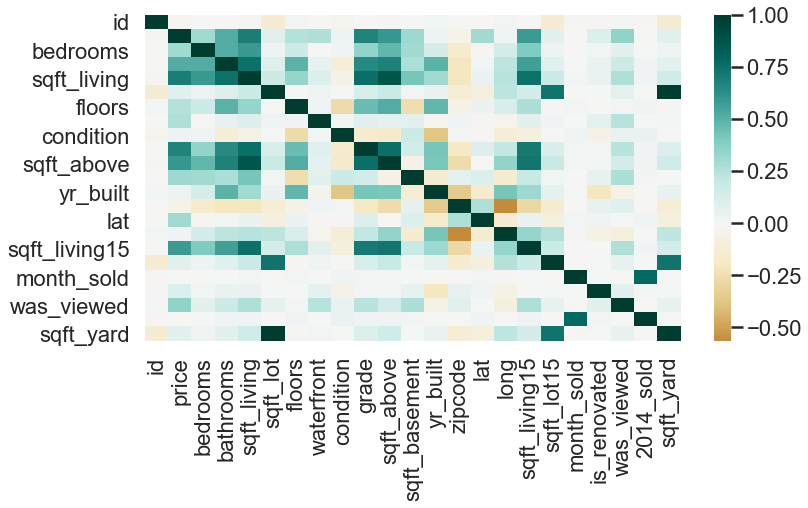

In [1407]:
# Creating a seaborn heatmap in order to determine multicolinearity
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(cleaned_data.corr(), center=0, cmap='BrBG')

In [1408]:
outcome = 'price'
x_cols = ['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
        'month_sold', 'is_renovated', 'was_viewed']

In [1409]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     3516.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:26   Log-Likelihood:            -2.8847e+05
No. Observations:               21158   AIC:                         5.770e+05
Df Residuals:                   21143   BIC:                         5.771e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.025e+06   2.86e+06      2.110      0.035    4.29e+05    1.16e+07
bedrooms      -3.687e+04   2016.942    -18.282      0.000   -4.08e+04   -3.29e+04
bathrooms      4.418e+04   3175.634     13.913      0.000     3.8e+04    5.04e+04
sqft_living     186.0367      3.379     55.055      0.000     179.413     192.660
waterfront     7.125e+05   1.76e+04     40.418      0.000    6.78e+05    7.47e+05
condition      2.755e+04   2400.291     11.479      0.000    2.28e+04    3.23e+04
grade          1.082e+05   2149.775     50.310      0.000    1.04e+05    1.12e+05
sqft_basement   -32.3417      3.928     -8.234      0.000     -40.040     -24.643
yr_built      -2622.9095     71.272    -36.801      0.000   -2762.609   -2483.210
zipcode        -596.7960     33.158    -17.999      0.000    -661.788    -531.804
lat            6.082e+05   1.08e+04     56.404      0.000    5.87e+05    6.29e+05
long          -2.293e+05   1.29e+04    -17.716      0.000   -2.55e+05   -2.04e+05
month_sold    -3059.4977    445.762     -6.864      0.000   -3933.225   -2185.770
is_renovated   4.731e+04   8009.683      5.906      0.000    3.16e+04     6.3e+04
was_viewed     1.166e+05   5181.704     22.501      0.000    1.06e+05    1.27e+05
==============================================================================
Omnibus:                    17699.066   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1712853.320
Skew:                           3.483   Prob(JB):                         0.00
Kurtosis:                      46.525   Cond. No.                     2.02e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

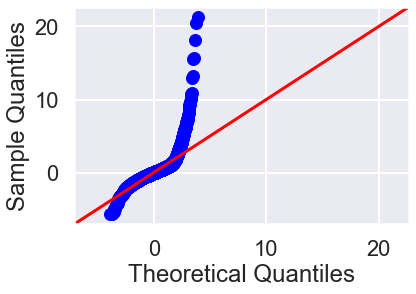

In [1410]:
# Checking for normality
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Poor normality but that was to be expected.

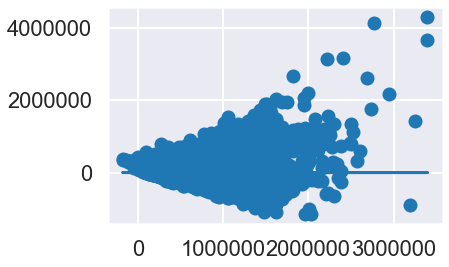

In [1411]:
# Checking for Homoscedasticity
plt.scatter(model.predict(cleaned_data[x_cols]), model.resid)
plt.plot(model.predict(cleaned_data[x_cols]), [0 for i in range(len(cleaned_data))])

It's clear that the baseline needs severe work. The following models will make more attempts to improve the model.

## Model 2 

For my first practical model, I incorporated all of the categorical variables. I did not transform the continuous variables yet or check for normality in this version until the end.

In [1412]:
cleaned_with_dummies.columns

Index(['id', 'price', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'is_renovated', 'was_viewed',
       '2014_sold', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'bedrooms_1_2', 'bedrooms_3_5', 'bedrooms_6_8', 'grade_average',
       'grade_good', 'grade_excellent', 'sold_quarter_two',
       'sold_quarter_three', 'sold_quarter_four', 'city_Bellevue',
       'city_Black Diamond', 'city_Bothell', 'city_Bryn Mawr-Skyway',
       'city_Burien', 'city_Carnation', 'city_Cottage Lake', 'city_Covington',
       'city_Des Moines', 'city_Duvall', 'city_East Hill-Meridian',
       'city_Enumclaw', 'city_Fairwood', 'city_Fall City', 'city_Federal Way',
       'city_Issaquah', 'city_Kenmore', 'city_Kent', 'city_Kirkland',
       'city_Lakeland North', 'city_Maple Valley', 'city_Medina',
       'city_Mercer Island', 'city_North Bend', 'city_Redmond', 'city_Renton',
 

In [1413]:
cleaned_with_dummies.columns = [col.replace(' ', '_') for col in cleaned_with_dummies.columns]
cleaned_with_dummies.columns = [col.replace('-', '_') for col in cleaned_with_dummies.columns]
cleaned_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21158 non-null  int64  
 1   price                         21158 non-null  float64
 2   bathrooms                     21158 non-null  float64
 3   sqft_living                   21158 non-null  int64  
 4   sqft_lot                      21158 non-null  int64  
 5   waterfront                    21158 non-null  int64  
 6   sqft_above                    21158 non-null  int64  
 7   sqft_basement                 21158 non-null  int64  
 8   yr_built                      21158 non-null  int64  
 9   lat                           21158 non-null  float64
 10  long                          21158 non-null  float64
 11  sqft_living15                 21158 non-null  int64  
 12  sqft_lot15                    21158 non-null  int64  
 13  i

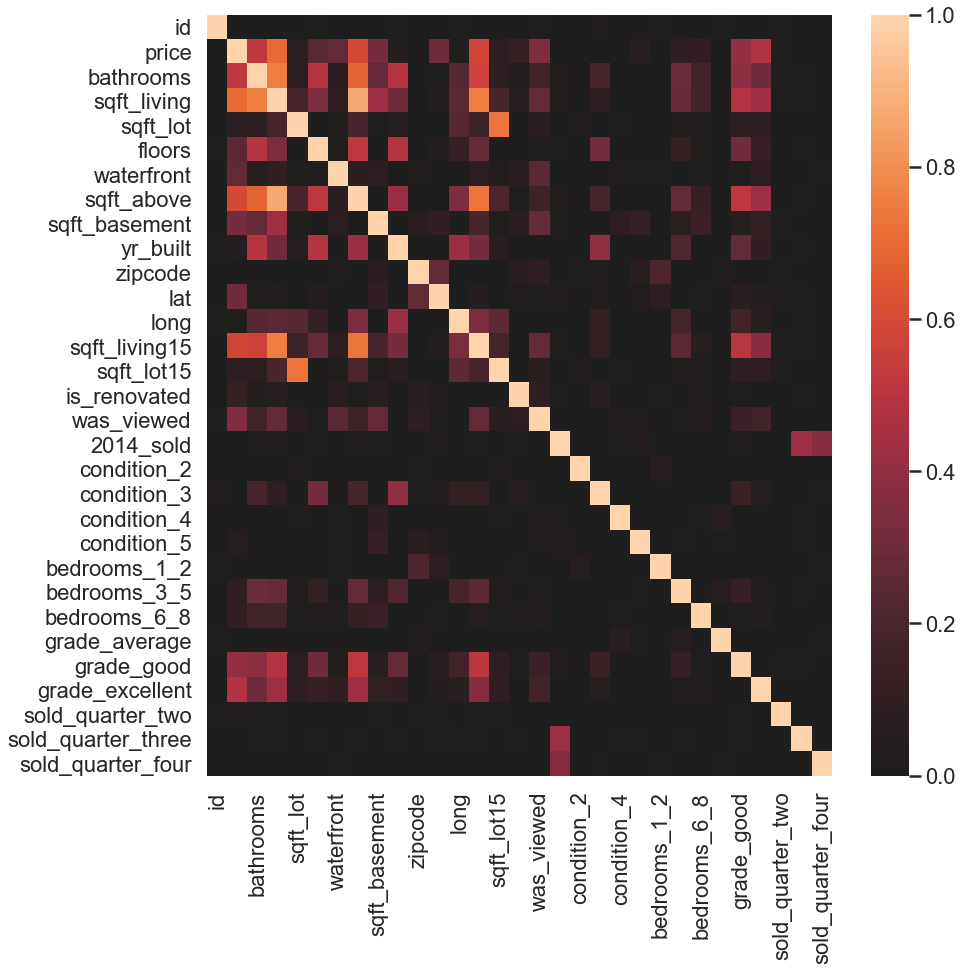

In [1414]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(df_dv2.corr(), center=0, vmin = 0, vmax = 1)

In [1415]:
outcome = 'price'
x_cols = list(cleaned_with_dummies.columns)
x_cols.remove(outcome)
x_cols.remove('id')
x_cols.remove('2014_sold')

In [1416]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_with_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1079.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:29   Log-Likelihood:            -2.8595e+05
No. Observations:               21158   AIC:                         5.720e+05
Df Residuals:                   21094   BIC:                         5.725e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -7.219e+07   4.55e+06    -15.868      0.000   -8.11e+07   -6.33e+07
bathrooms                      3.76e+04   2953.938     12.729      0.000    3.18e+04    4.34e+04
sqft_living                    100.9843      1.958     51.570      0.000      97.146     104.823
sqft_lot                         0.2164      0.045      4.790      0.000       0.128       0.305
waterfront                    7.407e+05   1.58e+04     46.740      0.000     7.1e+05    7.72e+05
sqft_above                      75.7387      2.094     36.174      0.000      71.635      79.843
sqft_basement                   25.2456      2.390     10.562      0.000      20.560      29.931
yr_built                     -1154.0974     72.984    -15.813      0.000   -1297.152   -1011.043
lat                           4.707e+05   3.02e+04     15.590      0.000    4.12e+05     5.3e+05
long                          -4.23e+05   3.54e+04    -11.932      0.000   -4.92e+05   -3.53e+05
sqft_living15                   35.7279      3.182     11.227      0.000      29.490      41.965
sqft_lot15                      -0.2073      0.070     -2.977      0.003      -0.344      -0.071
is_renovated                  5.847e+04   7199.337      8.121      0.000    4.44e+04    7.26e+04
was_viewed                    1.057e+05   4735.823     22.323      0.000    9.64e+04    1.15e+05
condition_2                   8.192e+04   4.39e+04      1.868      0.062   -4034.429    1.68e+05
condition_3                   9.052e+04   4.13e+04      2.190      0.029    9489.822    1.72e+05
condition_4                   1.105e+05   4.13e+04      2.673      0.008    2.95e+04    1.92e+05
condition_5                    1.52e+05   4.15e+04      3.661      0.000    7.06e+04    2.33e+05
bedrooms_1_2                  2.331e+05   5.72e+04      4.072      0.000    1.21e+05    3.45e+05
bedrooms_3_5                  2.051e+05    5.7e+04      3.595      0.000    9.33e+04    3.17e+05
bedrooms_6_8                  1.581e+05   5.77e+04      2.738      0.006     4.5e+04    2.71e+05
grade_average                 2.098e+04   4911.052      4.273      0.000    1.14e+04    3.06e+04
grade_good                     1.42e+05   6939.286     20.459      0.000    1.28e+05    1.56e+05
grade_excellent               5.083e+05   1.21e+04     42.175      0.000    4.85e+05    5.32e+05
sold_quarter_two             -3243.9881   3587.757     -0.904      0.366   -1.03e+04    3788.290
sold_quarter_three           -2.084e+04   3692.959     -5.642      0.000   -2.81e+04   -1.36e+04
sold_quarter_four             -2.13e+04   3872.329     -5.500      0.000   -2.89e+04   -1.37e+04
city_Bellevue                 2.512e+05   1.28e+04     19.633      0.000    2.26e+05    2.76e+05
city_Black_Diamond            1.355e+05   2.13e+04      6.376      0.000    

R-Squared value 0.763 is higher than our previous baseline model. There are a number of coefficients with pvalues > 0.05

In [1417]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

65 53
['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-7.219e+07,4.55e+06,-15.868,0.0,-8.11e+07,-6.33e+07
bathrooms,3.76e+04,2953.938,12.729,0.0,3.18e+04,4.34e+04
sqft_living,100.9843,1.958,51.570,0.0,97.146,104.823
sqft_lot,0.2164,0.045,4.790,0.0,0.128,0.305
waterfront,7.407e+05,1.58e+04,46.740,0.0,7.1e+05,7.72e+05


In [1418]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_with_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1306.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:29   Log-Likelihood:            -2.8596e+05
No. Observations:               21158   AIC:                         5.720e+05
Df Residuals:                   21105   BIC:                         5.725e+05
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -6.606e+07   3.98e+06    -16.581      0.000   -7.39e+07   -5.82e+07
bathrooms                     3.668e+04   2869.076     12.784      0.000    3.11e+04    4.23e+04
sqft_living                    100.9671      1.949     51.804      0.000      97.147     104.787
sqft_lot                         0.2165      0.045      4.798      0.000       0.128       0.305
waterfront                    7.406e+05   1.58e+04     46.744      0.000     7.1e+05    7.72e+05
sqft_above                      74.7678      1.895     39.453      0.000      71.053      78.482
sqft_basement                   26.1993      2.163     12.113      0.000      21.960      30.439
yr_built                     -1156.2578     66.658    -17.346      0.000   -1286.912   -1025.603
lat                           4.493e+05   1.87e+04     23.998      0.000    4.13e+05    4.86e+05
long                         -3.816e+05   2.98e+04    -12.815      0.000    -4.4e+05   -3.23e+05
sqft_living15                   35.2940      3.173     11.123      0.000      29.075      41.513
sqft_lot15                      -0.2038      0.069     -2.937      0.003      -0.340      -0.068
is_renovated                  5.847e+04   7177.603      8.145      0.000    4.44e+04    7.25e+04
was_viewed                    1.062e+05   4722.240     22.480      0.000    9.69e+04    1.15e+05
condition_3                   1.779e+04   1.43e+04      1.247      0.212   -1.02e+04    4.57e+04
condition_4                   3.859e+04   1.43e+04      2.696      0.007    1.05e+04    6.66e+04
condition_5                   8.056e+04   1.48e+04      5.436      0.000    5.15e+04     1.1e+05
bedrooms_1_2                  2.336e+05   5.72e+04      4.081      0.000    1.21e+05    3.46e+05
bedrooms_3_5                   2.06e+05    5.7e+04      3.611      0.000    9.42e+04    3.18e+05
bedrooms_6_8                  1.594e+05   5.78e+04      2.760      0.006    4.62e+04    2.73e+05
grade_average                  2.09e+04   4895.361      4.270      0.000    1.13e+04    3.05e+04
grade_good                    1.415e+05   6924.058     20.431      0.000    1.28e+05    1.55e+05
grade_excellent               5.096e+05    1.2e+04     42.381      0.000    4.86e+05    5.33e+05
sold_quarter_three           -1.886e+04   2933.440     -6.430      0.000   -2.46e+04   -1.31e+04
sold_quarter_four            -1.943e+04   3160.574     -6.147      0.000   -2.56e+04   -1.32e+04
city_Bellevue                 2.591e+05   6438.273     40.241      0.000    2.46e+05    2.72e+05
city_Black_Diamond             1.31e+05   1.97e+04      6.636      0.000    9.23e+04     1.7e+05
city_Bothell                 -7.202e+04   1.46e+04     -4.925      0.000   -1.01e+05   -4.34e+04
city_Bryn_Mawr_Skyway        -7.039e+04   1.23e+04     -5.746      0.000   -

In [1419]:
# Extract the p-value table from the summary and use it to subset our features
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

54 52
['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-6.606e+07,3.98e+06,-16.581,0.0,-7.39e+07,-5.82e+07
bathrooms,3.668e+04,2869.076,12.784,0.0,3.11e+04,4.23e+04
sqft_living,100.9671,1.949,51.804,0.0,97.147,104.787
sqft_lot,0.2165,0.045,4.798,0.0,0.128,0.305
waterfront,7.406e+05,1.58e+04,46.744,0.0,7.1e+05,7.72e+05


In [1420]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cleaned_with_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     1331.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:03:30   Log-Likelihood:            -2.8596e+05
No. Observations:               21158   AIC:                         5.720e+05
Df Residuals:                   21106   BIC:                         5.724e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -6.614e+07   3.98e+06    -16.604      0.000   -7.39e+07   -5.83e+07
bathrooms                     3.669e+04   2869.106     12.787      0.000    3.11e+04    4.23e+04
sqft_living                    100.9825      1.949     51.812      0.000      97.162     104.803
sqft_lot                         0.2156      0.045      4.778      0.000       0.127       0.304
waterfront                    7.406e+05   1.58e+04     46.742      0.000     7.1e+05    7.72e+05
sqft_above                      74.7869      1.895     39.464      0.000      71.072      78.501
sqft_basement                   26.1956      2.163     12.111      0.000      21.956      30.435
yr_built                     -1150.3723     66.491    -17.301      0.000   -1280.701   -1020.044
lat                           4.499e+05   1.87e+04     24.034      0.000    4.13e+05    4.87e+05
long                         -3.822e+05   2.98e+04    -12.833      0.000   -4.41e+05   -3.24e+05
sqft_living15                   35.2968      3.173     11.124      0.000      29.077      41.516
sqft_lot15                      -0.2046      0.069     -2.948      0.003      -0.341      -0.069
is_renovated                  5.874e+04   7174.285      8.188      0.000    4.47e+04    7.28e+04
was_viewed                    1.062e+05   4722.088     22.493      0.000     9.7e+04    1.15e+05
condition_4                   2.118e+04   3187.550      6.646      0.000    1.49e+04    2.74e+04
condition_5                   6.319e+04   5073.735     12.455      0.000    5.32e+04    7.31e+04
bedrooms_1_2                  2.334e+05   5.72e+04      4.076      0.000    1.21e+05    3.46e+05
bedrooms_3_5                  2.058e+05    5.7e+04      3.608      0.000     9.4e+04    3.18e+05
bedrooms_6_8                  1.591e+05   5.78e+04      2.755      0.006    4.59e+04    2.72e+05
grade_average                 2.122e+04   4888.771      4.341      0.000    1.16e+04    3.08e+04
grade_good                    1.418e+05   6918.655     20.497      0.000    1.28e+05    1.55e+05
grade_excellent               5.099e+05    1.2e+04     42.420      0.000    4.86e+05    5.33e+05
sold_quarter_three           -1.879e+04   2932.997     -6.408      0.000   -2.45e+04    -1.3e+04
sold_quarter_four             -1.94e+04   3160.551     -6.139      0.000   -2.56e+04   -1.32e+04
city_Bellevue                  2.59e+05   6437.763     40.227      0.000    2.46e+05    2.72e+05
city_Black_Diamond            1.313e+05   1.97e+04      6.654      0.000    9.27e+04     1.7e+05
city_Bothell                 -7.214e+04   1.46e+04     -4.933      0.000   -1.01e+05   -4.35e+04
city_Bryn_Mawr_Skyway        -7.018e+04   1.22e+04     -5.729      0.000   -9.42e+04   -4.62e+04
city_Burien                  -5.937e+04   1.22e+04     -4.864      0.000   -

In [1421]:
X = cleaned_with_dummies[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('bathrooms', 27.708545206187676),
 ('sqft_living', inf),
 ('sqft_lot', 2.5156892567279763),
 ('waterfront', 1.1064864998084554),
 ('sqft_above', inf),
 ('sqft_basement', inf),
 ('yr_built', 11245.831259126076),
 ('lat', 401549.98386579554),
 ('long', 412653.70572075655),
 ('sqft_living15', 29.42666658051345),
 ('sqft_lot15', 2.852176134488544),
 ('is_renovated', 1.1740471379328106),
 ('was_viewed', 1.444257108601811),
 ('condition_4', 1.7503946314584167),
 ('condition_5', 1.319914370124141),
 ('bedrooms_1_2', 280.1598036626112),
 ('bedrooms_3_5', 1826.3615533550972),
 ('bedrooms_6_8', 32.40441486583459),
 ('grade_average', 11.016587960343827),
 ('grade_good', 5.523658946159605),
 ('grade_excellent', 2.221397808139322),
 ('sold_quarter_three', 1.5460882407125103),
 ('sold_quarter_four', 1.4391367137459041),
 ('city_Bellevue', 1.7389052096362707),
 ('city_Black_Diamond', 1.0392488419641979),
 ('city_Bothell', 1.193221236167525),
 ('city_Bryn_Mawr_Skyway', 1.1164365671900713),
 ('city_B

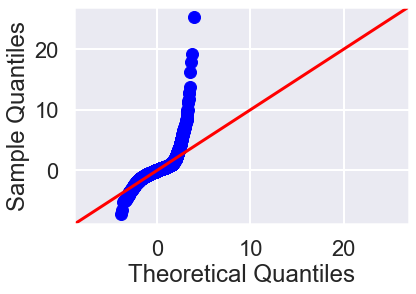

In [1422]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Lack of normality as shown by the QQ Plot indicates that the data needs to be transformed further.

This model was an improvement over the baseline model but it indicates that the dataset needs to be manipulated further.

## Model 3 

This model incorporated log transformations and feature scaling to our continuous data.

In [1423]:
cleaned_with_dummies.columns
log_and_dummies = cleaned_with_dummies

In [1424]:
log_and_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            21158 non-null  int64  
 1   price                         21158 non-null  float64
 2   bathrooms                     21158 non-null  float64
 3   sqft_living                   21158 non-null  int64  
 4   sqft_lot                      21158 non-null  int64  
 5   waterfront                    21158 non-null  int64  
 6   sqft_above                    21158 non-null  int64  
 7   sqft_basement                 21158 non-null  int64  
 8   yr_built                      21158 non-null  int64  
 9   lat                           21158 non-null  float64
 10  long                          21158 non-null  float64
 11  sqft_living15                 21158 non-null  int64  
 12  sqft_lot15                    21158 non-null  int64  
 13  i

In [1425]:
continuous_var = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15']

In [1426]:
for col in continuous_var:
    log_and_dummies.drop(log_and_dummies.loc[np.abs(stats.zscore(log_and_dummies[col]))>3].index, axis=0, inplace=True)
log_and_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19592 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            19592 non-null  int64  
 1   price                         19592 non-null  float64
 2   bathrooms                     19592 non-null  float64
 3   sqft_living                   19592 non-null  int64  
 4   sqft_lot                      19592 non-null  int64  
 5   waterfront                    19592 non-null  int64  
 6   sqft_above                    19592 non-null  int64  
 7   sqft_basement                 19592 non-null  int64  
 8   yr_built                      19592 non-null  int64  
 9   lat                           19592 non-null  float64
 10  long                          19592 non-null  float64
 11  sqft_living15                 19592 non-null  int64  
 12  sqft_lot15                    19592 non-null  int64  
 13  i

Roughly three thousand houses were removed from the dataset because they were designated outliers by their z-score.

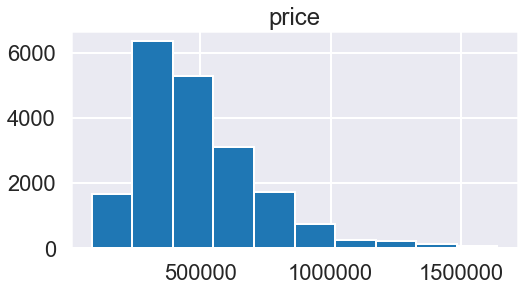

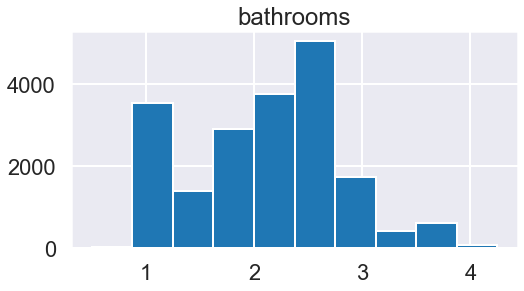

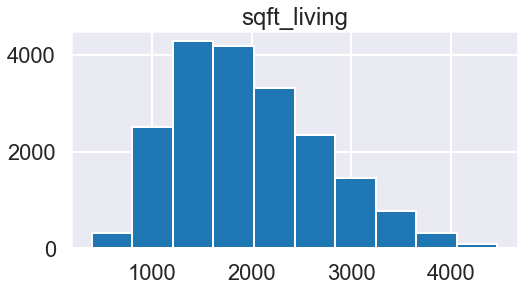

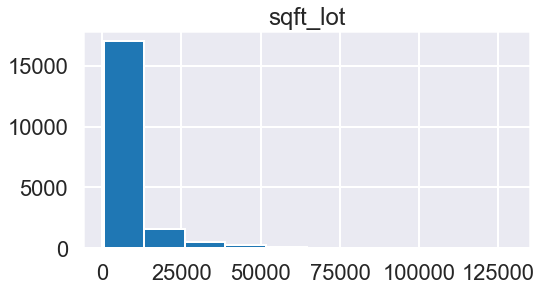

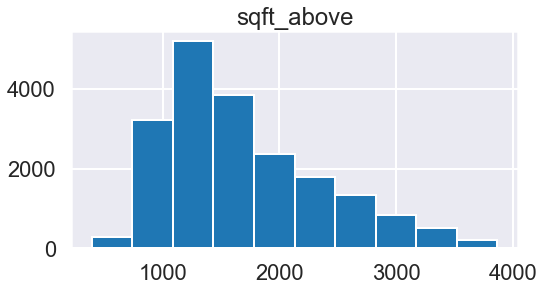

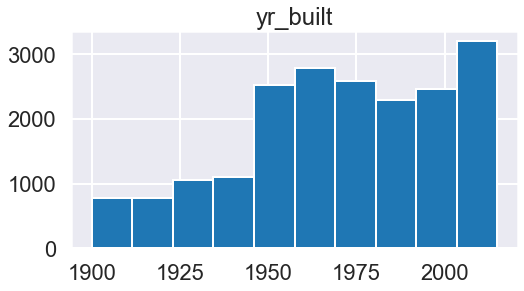

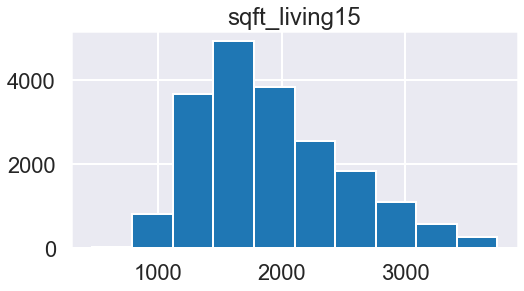

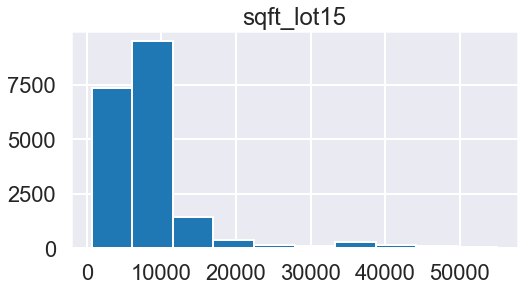

In [1427]:
for col in continuous_var:
    plt.figure(figsize = (8,4))
    plt.hist(cleaned_with_dummies[col])
    plt.title(col)
    plt.show()

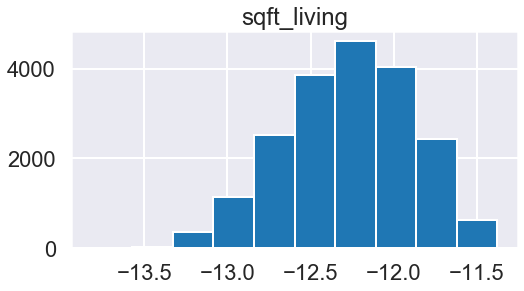

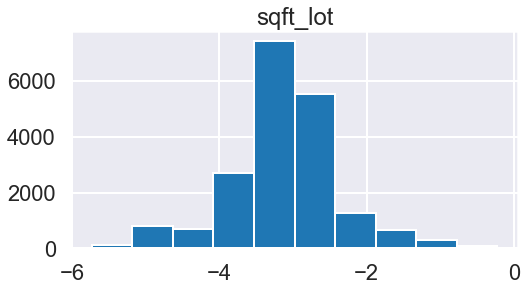

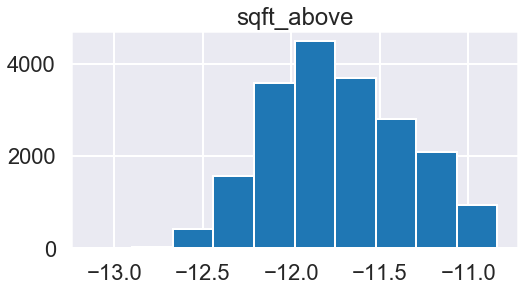

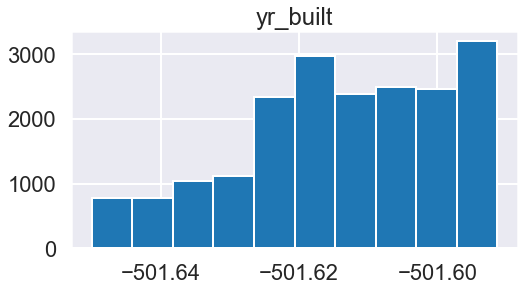

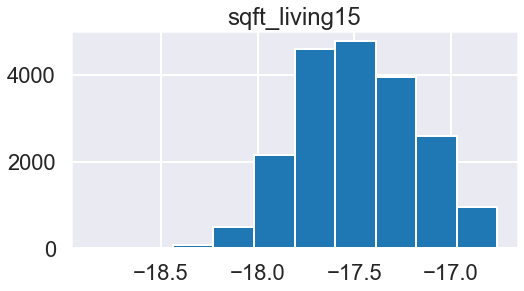

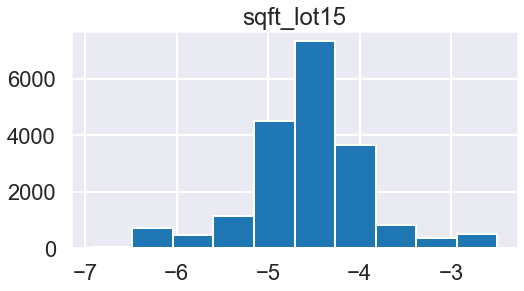

In [1428]:
continuous_var.remove('bathrooms')
continuous_var.remove('price')
for var in continuous_var:
    log_and_dummies[var] = log_and_dummies[var].map(lambda x: np.log(x))
    log_and_dummies[var] = (log_and_dummies[var] - np.mean(log_and_dummies[var]) / np.sqrt(np.var(log_and_dummies[var])))
for col in continuous_var:
    plt.figure(figsize = (8,4))
    plt.hist(log_and_dummies[col])
    plt.title(col)
    plt.show()

In [1429]:
log_and_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19592 entries, 0 to 21596
Data columns (total 67 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            19592 non-null  int64  
 1   price                         19592 non-null  float64
 2   bathrooms                     19592 non-null  float64
 3   sqft_living                   19592 non-null  float64
 4   sqft_lot                      19592 non-null  float64
 5   waterfront                    19592 non-null  int64  
 6   sqft_above                    19592 non-null  float64
 7   sqft_basement                 19592 non-null  int64  
 8   yr_built                      19592 non-null  float64
 9   lat                           19592 non-null  float64
 10  long                          19592 non-null  float64
 11  sqft_living15                 19592 non-null  float64
 12  sqft_lot15                    19592 non-null  float64
 13  i

In [1439]:
outcome = 'price'
x_cols = list(log_and_dummies.columns)
x_cols.remove(outcome)
x_cols.remove('id')
x_cols.remove('2014_sold')
x_cols.remove('sqft_above')

In [1440]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=log_and_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     916.8
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:08:00   Log-Likelihood:            -2.5717e+05
No. Observations:               19592   AIC:                         5.145e+05
Df Residuals:                   19528   BIC:                         5.150e+05
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.173e+09   5.12e+07    -22.900      0.000   -1.27e+09   -1.07e+09
bathrooms                     3.084e+04   2217.098     13.910      0.000    2.65e+04    3.52e+04
sqft_living                   2.021e+05   5204.152     38.840      0.000    1.92e+05    2.12e+05
sqft_lot                      1.296e+04   3007.444      4.309      0.000    7064.015    1.89e+04
waterfront                    3.379e+05   1.61e+04     21.013      0.000    3.06e+05    3.69e+05
sqft_basement                  -20.6607      3.099     -6.667      0.000     -26.735     -14.587
yr_built                     -2.233e+06   1.02e+05    -21.873      0.000   -2.43e+06   -2.03e+06
lat                           3.771e+05    2.1e+04     17.963      0.000    3.36e+05    4.18e+05
long                         -3.224e+05   2.58e+04    -12.482      0.000   -3.73e+05   -2.72e+05
sqft_living15                 1.103e+05   4814.064     22.902      0.000    1.01e+05     1.2e+05
sqft_lot15                   -1.513e+04   3341.408     -4.527      0.000   -2.17e+04   -8575.840
is_renovated                  4.808e+04   5204.118      9.239      0.000    3.79e+04    5.83e+04
was_viewed                    9.252e+04   3512.949     26.336      0.000    8.56e+04    9.94e+04
condition_2                   6.355e+04   3.06e+04      2.074      0.038    3478.820    1.24e+05
condition_3                   8.734e+04   2.88e+04      3.033      0.002    3.09e+04    1.44e+05
condition_4                   1.069e+05   2.88e+04      3.711      0.000    5.04e+04    1.63e+05
condition_5                   1.439e+05   2.89e+04      4.976      0.000    8.72e+04    2.01e+05
bedrooms_1_2                   8.72e+04   5.46e+04      1.596      0.111   -1.99e+04    1.94e+05
bedrooms_3_5                  6.711e+04   5.45e+04      1.230      0.219   -3.98e+04    1.74e+05
bedrooms_6_8                  3.696e+04   5.51e+04      0.671      0.502    -7.1e+04    1.45e+05
grade_average                 2.467e+04   3471.220      7.108      0.000    1.79e+04    3.15e+04
grade_good                    1.795e+05   4905.365     36.590      0.000     1.7e+05    1.89e+05
grade_excellent               3.643e+05   1.37e+04     26.570      0.000    3.37e+05    3.91e+05
sold_quarter_two             -1403.4745   2524.893     -0.556      0.578   -6352.481    3545.532
sold_quarter_three           -1.759e+04   2596.157     -6.774      0.000   -2.27e+04   -1.25e+04
sold_quarter_four             -1.69e+04   2720.543     -6.211      0.000   -2.22e+04   -1.16e+04
city_Bellevue                 2.382e+05   9030.871     26.371      0.000     2.2e+05    2.56e+05
city_Black_Diamond            1.406e+05   1.62e+04      8.682      0.000    1.09e+05    1.72e+05
city_Bothell                 -3.286e+04   1.41e+04     -2.333      0.020   -

In [1432]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
x_cols.remove('Intercept')
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

65 51
['bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'sqft_above']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-1.121e+09,5.05e+07,-22.183,0.000,-1.22e+09,-1.02e+09
bathrooms,2.765e+04,2189.723,12.628,0.000,2.34e+04,3.19e+04
sqft_living,-1.188e+05,1.44e+04,-8.243,0.000,-1.47e+05,-9.06e+04
sqft_lot,8169.1274,2971.563,2.749,0.006,2344.610,1.4e+04
waterfront,3.467e+05,1.59e+04,21.864,0.000,3.16e+05,3.78e+05


In [1433]:
# Fitting the actual model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=log_and_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1171.
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:05:37   Log-Likelihood:            -2.5693e+05
No. Observations:               19592   AIC:                         5.140e+05
Df Residuals:                   19540   BIC:                         5.144e+05
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.062e+09   4.71e+07    -22.541      0.000   -1.15e+09    -9.7e+08
bathrooms                     2.843e+04   2135.227     13.312      0.000    2.42e+04    3.26e+04
sqft_living                  -1.099e+05   1.44e+04     -7.658      0.000   -1.38e+05   -8.18e+04
sqft_lot                      5951.5707   2936.088      2.027      0.043     196.588    1.17e+04
waterfront                      3.5e+05   1.58e+04     22.084      0.000    3.19e+05    3.81e+05
sqft_above                    3.036e+05   1.28e+04     23.729      0.000    2.79e+05    3.29e+05
sqft_basement                  133.5537      7.381     18.093      0.000     119.085     148.022
yr_built                     -2.024e+06   9.43e+04    -21.464      0.000   -2.21e+06   -1.84e+06
lat                           3.429e+05   1.06e+04     32.500      0.000    3.22e+05    3.64e+05
long                         -2.829e+05   1.69e+04    -16.743      0.000   -3.16e+05    -2.5e+05
sqft_living15                 1.124e+05   4727.826     23.783      0.000    1.03e+05    1.22e+05
sqft_lot15                   -1.391e+04   3285.505     -4.235      0.000   -2.04e+04   -7474.599
is_renovated                  4.827e+04   5127.397      9.415      0.000    3.82e+04    5.83e+04
was_viewed                    8.493e+04   3468.197     24.490      0.000    7.81e+04    9.17e+04
condition_2                   6.935e+04   3.03e+04      2.292      0.022       1e+04    1.29e+05
condition_3                   9.371e+04   2.84e+04      3.295      0.001     3.8e+04    1.49e+05
condition_4                   1.131e+05   2.84e+04      3.975      0.000    5.73e+04    1.69e+05
condition_5                   1.507e+05   2.86e+04      5.278      0.000    9.48e+04    2.07e+05
bedrooms_1_2                  1.626e+04   3011.888      5.400      0.000    1.04e+04    2.22e+04
grade_average                 2.695e+04   3406.338      7.910      0.000    2.03e+04    3.36e+04
grade_good                    1.761e+05   4829.560     36.473      0.000    1.67e+05    1.86e+05
grade_excellent               3.595e+05   1.35e+04     26.565      0.000    3.33e+05    3.86e+05
sold_quarter_three           -1.722e+04   2041.182     -8.436      0.000   -2.12e+04   -1.32e+04
sold_quarter_four            -1.666e+04   2196.247     -7.586      0.000    -2.1e+04   -1.24e+04
city_Bellevue                  2.44e+05   4579.569     53.280      0.000    2.35e+05    2.53e+05
city_Black_Diamond            1.399e+05    1.5e+04      9.300      0.000     1.1e+05    1.69e+05
city_Bryn_Mawr_Skyway        -2.544e+04   7995.907     -3.182      0.001   -4.11e+04   -9770.817
city_Carnation                1.083e+05   1.63e+04      6.653      0.000    7.64e+04     1.4e+05
city_Cottage_Lake             5.992e+04   1.13e+04      5.286      0.000    

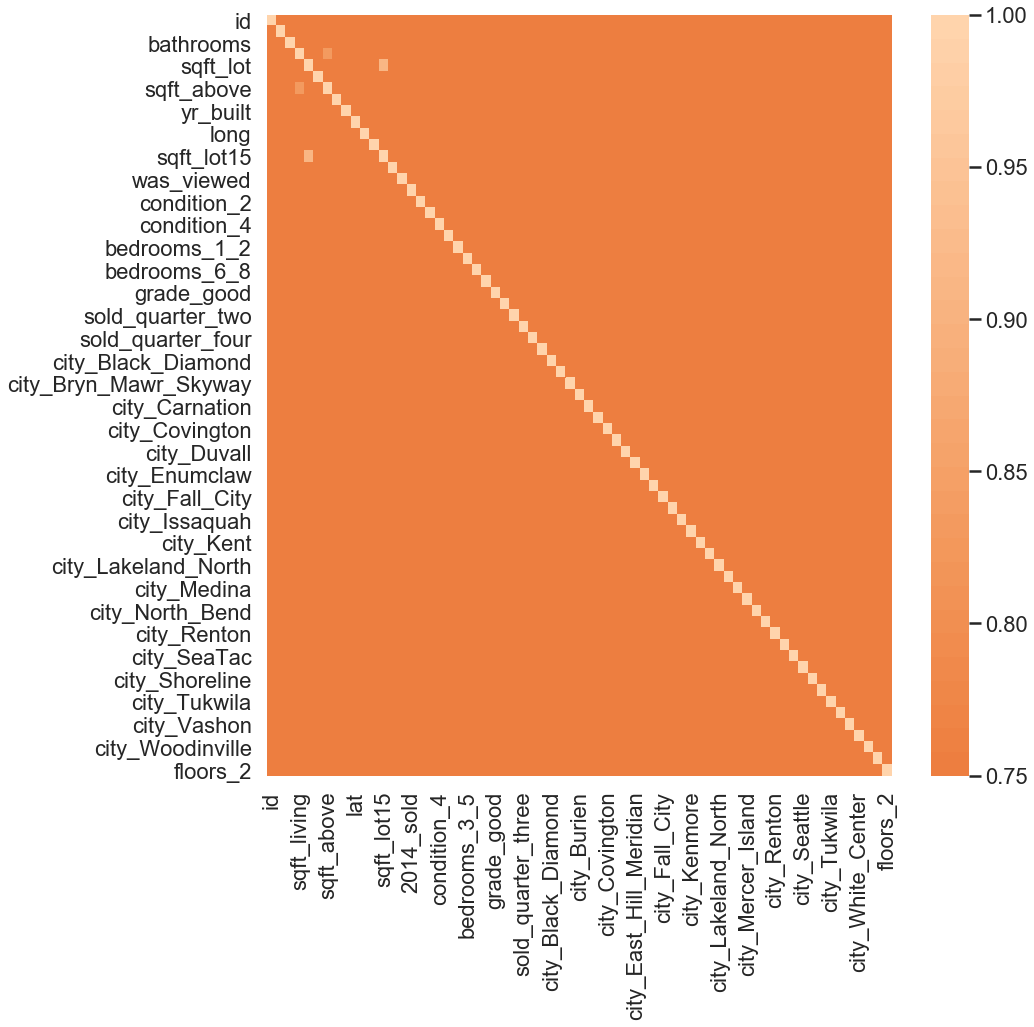

In [1443]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(log_and_dummies.corr(), center=0, vmin = 0.75)

In [1449]:
#x_cols.remove('sqft_basement')
#x_cols.remove('sqft_lot15')
#x_cols.remove('sqft_above')
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=log_and_dummies).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     942.7
Date:                Tue, 28 Jul 2020   Prob (F-statistic):               0.00
Time:                        01:13:42   Log-Likelihood:            -2.5720e+05
No. Observations:               19592   AIC:                         5.145e+05
Df Residuals:                   19530   BIC:                         5.150e+05
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -1.203e+09   5.12e+07    -23.508      0.000    -1.3e+09    -1.1e+09
bathrooms                     2.903e+04   2195.187     13.223      0.000    2.47e+04    3.33e+04
sqft_living                   1.866e+05   4579.024     40.754      0.000    1.78e+05    1.96e+05
sqft_lot                      3264.8383   1780.421      1.834      0.067    -224.940    6754.616
waterfront                    3.351e+05   1.61e+04     20.811      0.000    3.03e+05    3.67e+05
yr_built                     -2.292e+06   1.02e+05    -22.474      0.000   -2.49e+06   -2.09e+06
lat                           3.829e+05    2.1e+04     18.229      0.000    3.42e+05    4.24e+05
long                         -3.214e+05   2.58e+04    -12.435      0.000   -3.72e+05   -2.71e+05
sqft_living15                 1.106e+05   4758.539     23.234      0.000    1.01e+05     1.2e+05
is_renovated                  4.681e+04   5209.094      8.986      0.000    3.66e+04     5.7e+04
was_viewed                    8.963e+04   3489.232     25.688      0.000    8.28e+04    9.65e+04
condition_2                   5.932e+04   3.07e+04      1.933      0.053    -834.979    1.19e+05
condition_3                   8.314e+04   2.88e+04      2.883      0.004    2.66e+04     1.4e+05
condition_4                   1.012e+05   2.88e+04      3.509      0.000    4.47e+04    1.58e+05
condition_5                   1.375e+05    2.9e+04      4.749      0.000    8.08e+04    1.94e+05
bedrooms_1_2                  9.013e+04   5.47e+04      1.647      0.100   -1.71e+04    1.97e+05
bedrooms_3_5                  7.168e+04   5.46e+04      1.312      0.189   -3.54e+04    1.79e+05
bedrooms_6_8                  4.136e+04   5.52e+04      0.750      0.453   -6.68e+04    1.49e+05
grade_average                  2.58e+04   3473.841      7.428      0.000     1.9e+04    3.26e+04
grade_good                    1.826e+05   4882.100     37.397      0.000    1.73e+05    1.92e+05
grade_excellent               3.693e+05   1.37e+04     26.941      0.000    3.42e+05    3.96e+05
sold_quarter_two             -1555.9709   2528.737     -0.615      0.538   -6512.511    3400.570
sold_quarter_three           -1.747e+04   2600.304     -6.717      0.000   -2.26e+04   -1.24e+04
sold_quarter_four            -1.684e+04   2724.987     -6.179      0.000   -2.22e+04   -1.15e+04
city_Bellevue                 2.332e+05   9015.779     25.865      0.000    2.16e+05    2.51e+05
city_Black_Diamond            1.369e+05   1.62e+04      8.442      0.000    1.05e+05    1.69e+05
city_Bothell                 -3.746e+04   1.41e+04     -2.659      0.008   -6.51e+04   -9847.910
city_Bryn_Mawr_Skyway        -4.618e+04   1.06e+04     -4.372      0.000   -6.69e+04   -2.55e+04
city_Burien                  -1.141e+04   1.04e+04     -1.098      0.272   -

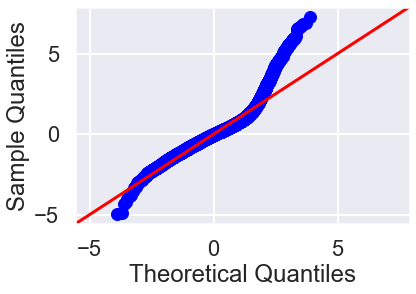

In [1450]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

The QQ Plot shows a higher degree of normalcy than what I have seen previously.

# Conclusion